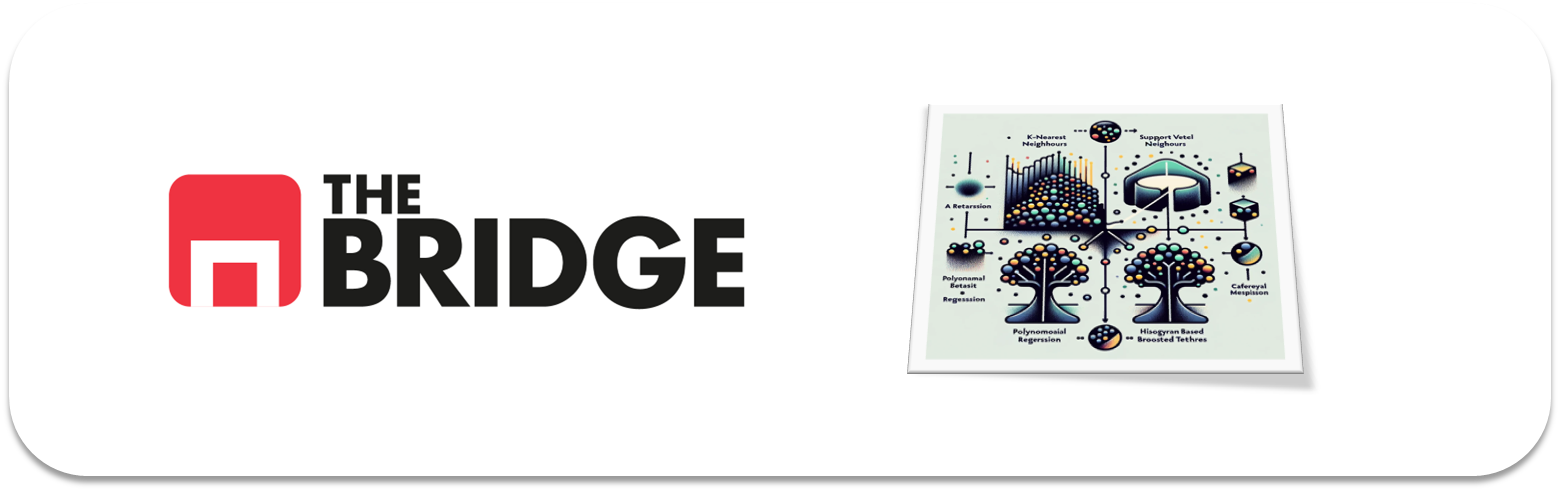

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append("../..") # Añadimos al path la carpeta que está 2 niveles arriba
import toolkit as tk

sys.path.append("../../Team_Challenge_SP10_T03")
import toolbox_ML as tb

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
# Cargamos el dataset y pegamos un vistazo a los datos

df = pd.read_csv("wines_dataset.csv", sep="|")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


#### VISUALIZAMOS LOS DATOS

In [3]:
# Comprobamos si hay duplicados

df.duplicated(keep = False).value_counts()

False    4328
True     2169
Name: count, dtype: int64

*Hay 2.169 valores duplicados de un total de 6.497 valores (33%). Pero OJO, no siempre los duplicados no son malos, dependerá de negocio y la cantidad de variables que tengamos* \
*En nuestro caso los vamos a mantener ya que podrían ser botellas diferentes de la misma producción, y por tanto con los mismos valores para cada parámetro*

In [4]:
tb.describe_df(df)

COL_N,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
DATE_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,106,187,89,316,214,135,276,998,108,111,111,7,2
CARDIN(%),1.63,2.88,1.37,4.86,3.29,2.08,4.25,15.36,1.66,1.71,1.71,0.11,0.03


In [5]:
tb.tipifica_variables(df)

,nombre_variable,dtype,tipo_sugerido
0,fixed acidity,float64,Numerica discreta
1,volatile acidity,float64,Numerica discreta
2,citric acid,float64,Numerica discreta
3,residual sugar,float64,Numerica discreta
4,chlorides,float64,Numerica discreta
5,free sulfur dioxide,float64,Numerica discreta
6,total sulfur dioxide,float64,Numerica discreta
7,density,float64,Numerica discreta
8,pH,float64,Numerica discreta
9,sulphates,float64,Numerica discreta


In [6]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [7]:
df["class"].value_counts()

class
white    4898
red      1599
Name: count, dtype: int64

*La variable "quality" originalmente es un entero pero los datos nos la clasifican como categórica, por lo que decidimos considerarla como tal. Habrá que hacer las modificaciones pertinentes* \
*Además, la variable "class" inicialmente es de tipo objeto y los datos nos la clasifican como binaria. Decidimos considerarla como tal. Habrá que hacer las modificaciones pertinentes*

In [8]:
bck_df = df.copy()

In [9]:
df = bck_df

In [11]:
# Convertimos la variable "class" a categórica mediante un LABEL ENCODING (creo que es mejor que utilizar el ONE-HOT ENCODING, que no sé si se puede utilizar en este caso)
# Class = 1 -> White wine
# Class = 0 -> Red wine

label_encoder_class = LabelEncoder()

label_encoder_class.fit(df["class"])
df["class"] = label_encoder_class.transform(df["class"])

In [12]:
df.describe()

COL_N,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


*Hay variables que tienen rangos muy amplios, por lo que tendremos que decidir si escalar los datos dependiendo del modelo que utilicemos*

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

#### ESCOGEMOS LA VARIABLE TARGET

En cuanto a la variable target para la parte de clasificación, ésta sería *"quality"*. La comprobamos visualmente

In [13]:
target_clf = "quality"

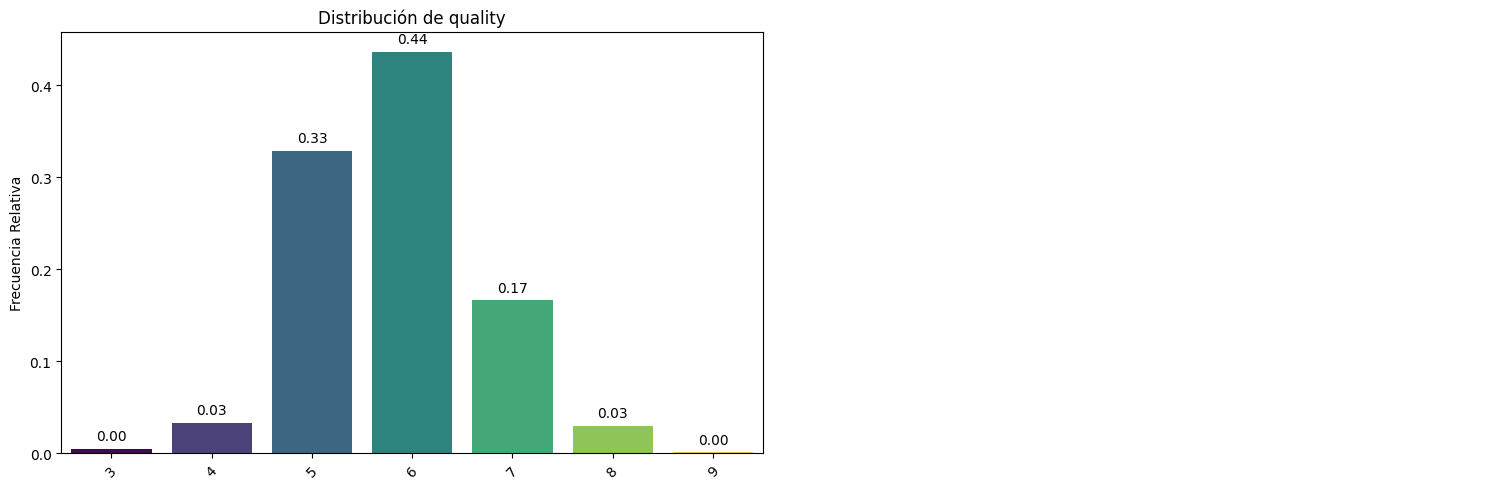

In [14]:
# Comprobamos la frecuencia de la variable target

tk.pinta_distribucion_categoricas(df, [target_clf], mostrar_valores= True, relativa= True)

*Hay bastante desbalanceo en los datos entre las diferentes categorías* \
*Habría que tenerlo en cuenta a la hora de hacer el split entre train y test. Se podría hacer por ejemplo un OVERSAMPLING con SMOTE, UNDERSAMPLING o Ajuste de Peso de Clases (Class-Weight)* \
*Nota: Para el árbol de decisión no haría falta aplicar OVERSAMPLING o UNDERSAMPLING, podemos usar el hiperparámetro "class_weight" = "balanced" para que lo trate directamente el algoritmo* \
\
*En nuestro caso aplicaremos un OVERSAMPLING con SMOTE para practicar*

#### HACEMOS EL SPLIT ENTRE TRAIN Y TEST

In [15]:
# Dividimos entre train y test

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
# Generamos las parejas X,y de train y test

X_train = train_set.drop(target_clf, axis = 1)
y_train = train_set[target_clf]
X_test = test_set.drop(target_clf, axis = 1)
y_test = test_set[target_clf]

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [18]:
df.dtypes

COL_N
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                     int32
dtype: object

In [19]:
# Vamos a aplicar un OVERSAMPLING para equilibrar los datos de la variable target. Para poder aplicarlo todas las columnas tienen que ser numéricas
# Solo se aplica en el train set

smote = SMOTE(sampling_strategy="auto", k_neighbors=4)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [20]:
y_train_smote.value_counts(True)

quality
5    0.142857
6    0.142857
7    0.142857
3    0.142857
4    0.142857
8    0.142857
9    0.142857
Name: proportion, dtype: float64

*Ahora los datos de train y test están balanceados para todas las clases (lo cual no tiene que ser mejor para el modelo. Veremos..)*

#### HACEMOS UN MINI EDA DE LOS DATOS DE TRAIN

In [21]:
# Agrupamos X_train_smote y y_train_smote en un solo DataFrame para hacer el mini EDA

train_set_smote = pd.concat([X_train_smote, y_train_smote], axis = 1)

In [22]:
# Convertimos la variable quality en categórica (tipo object) para poder hacer las comparaciones. Tendremos que volver a convertirla en numérica antes de aplicar el modelo

train_set_smote["quality"] = train_set_smote["quality"].astype("object")

In [23]:
features_cat = ["class"]

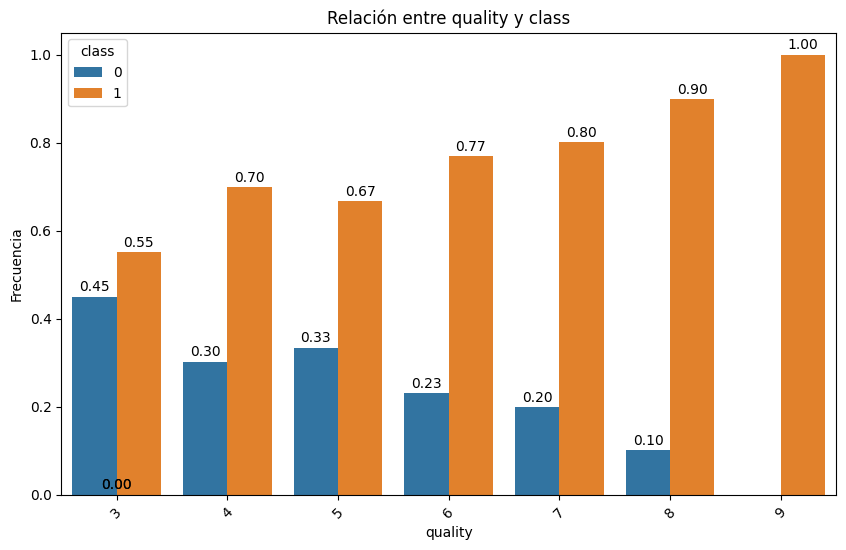

In [24]:
for feat in features_cat:
    tk.plot_categorical_relationship_fin(train_set_smote, target_clf, feat, show_values= True, relative_freq= True, size_group=7)

*Entiendo una relación entre la variable "class" y la target "quality". A medida que aumentamos la calidad del vino, la proporción de vinos blancos aumenta. Esto puede ser un indicador de que los vinos blancos son de mayor calidad que los vinos tintos.*

In [25]:
features_cat

['class']

In [26]:
features_num = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

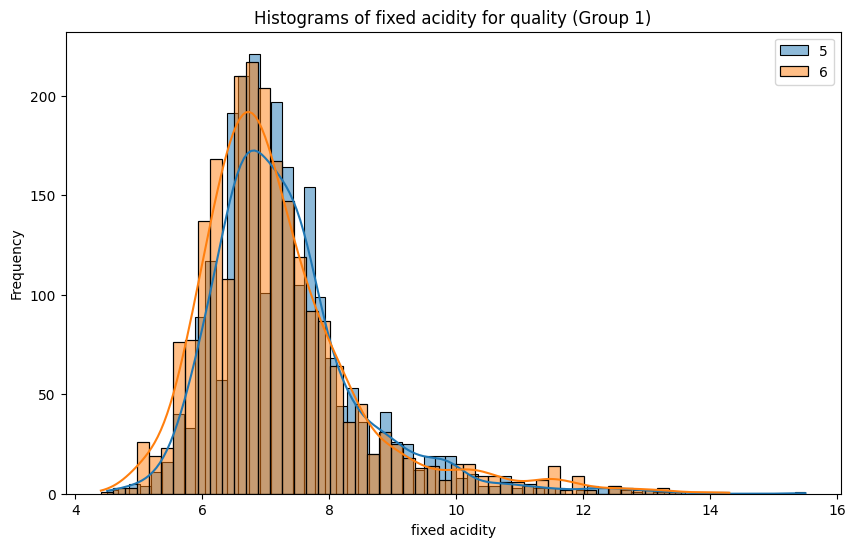

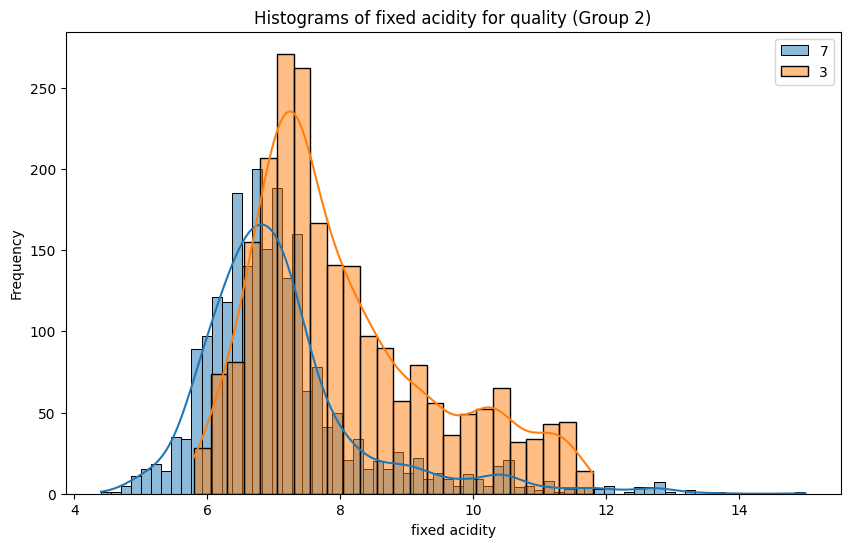

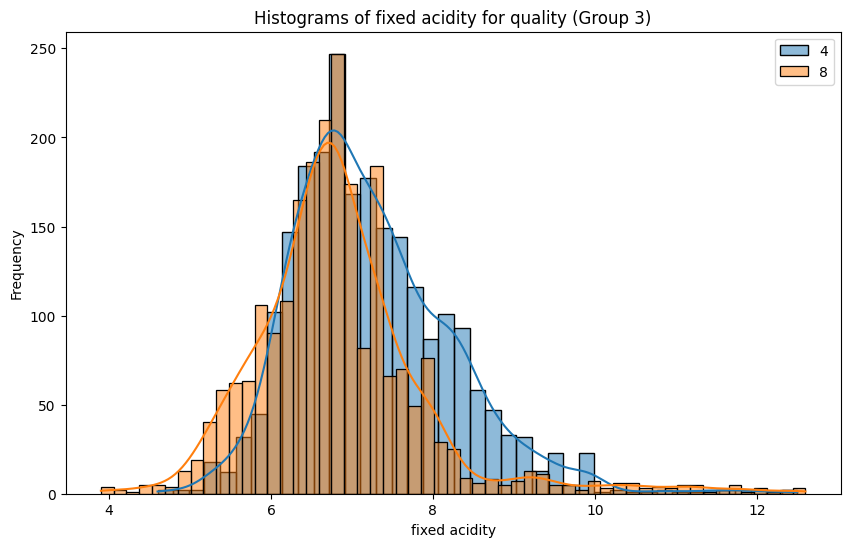

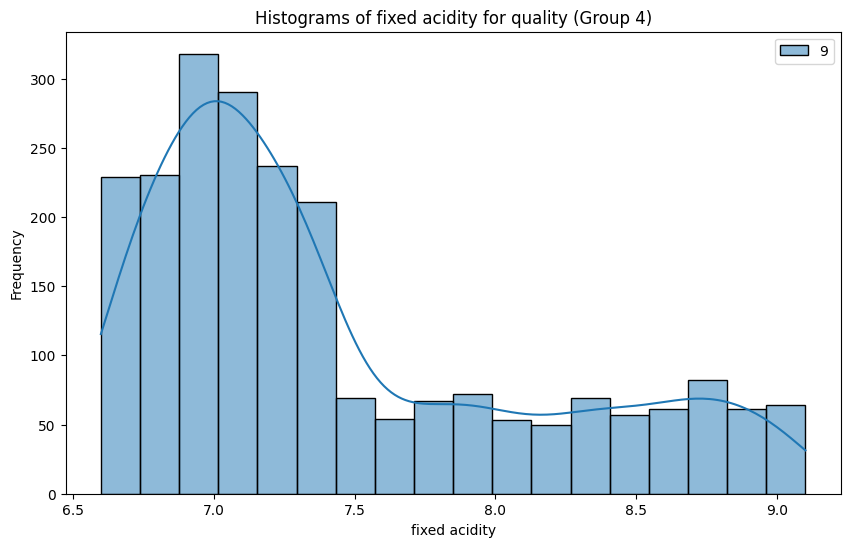

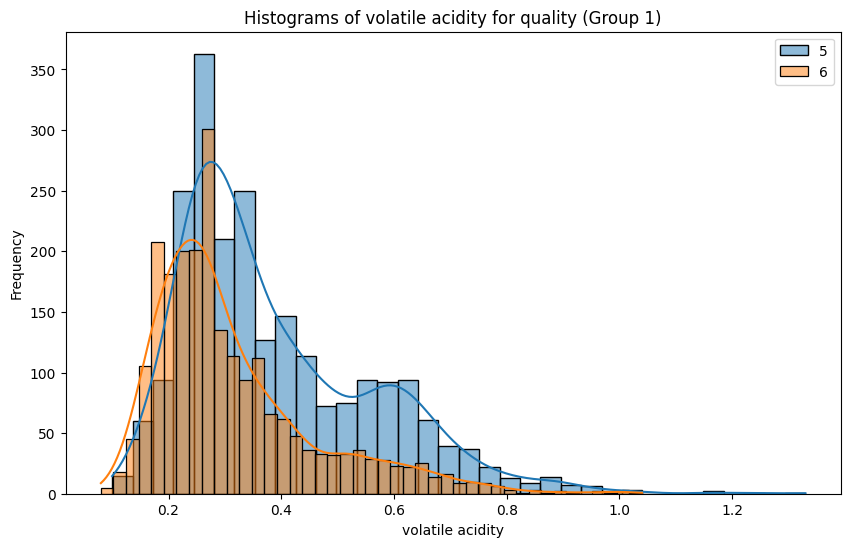

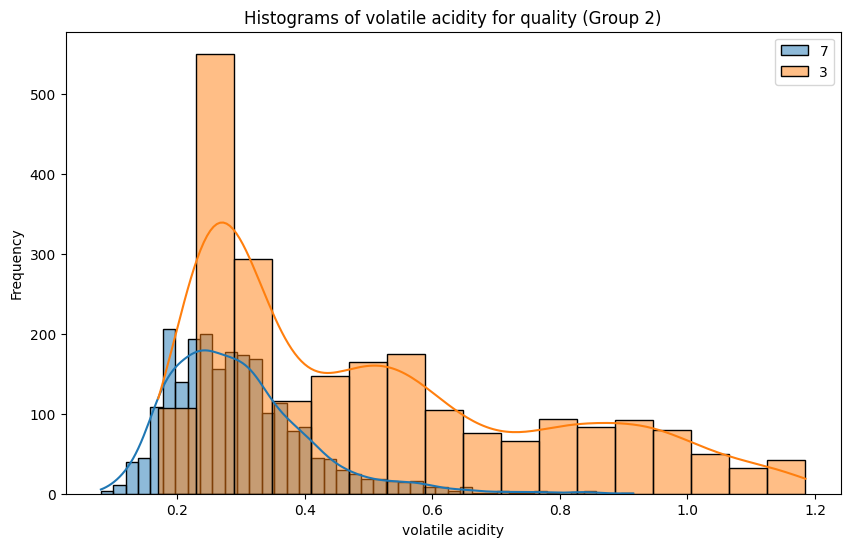

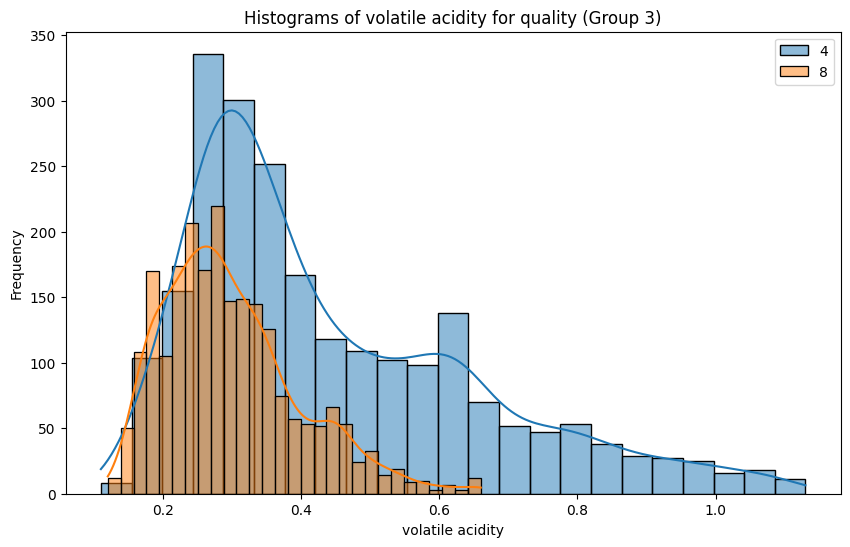

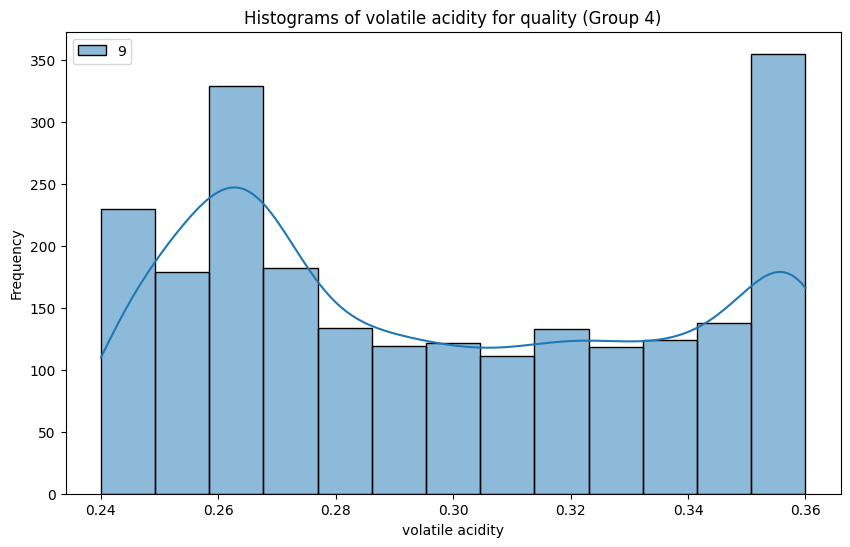

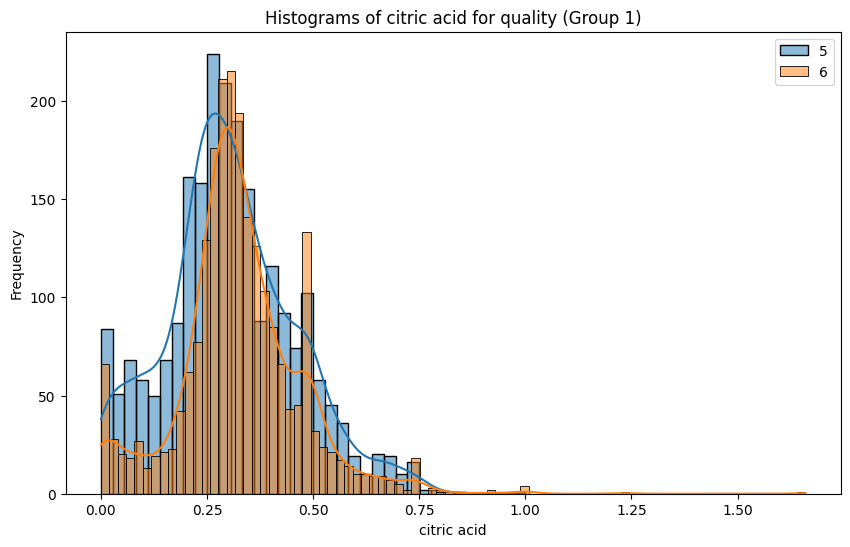

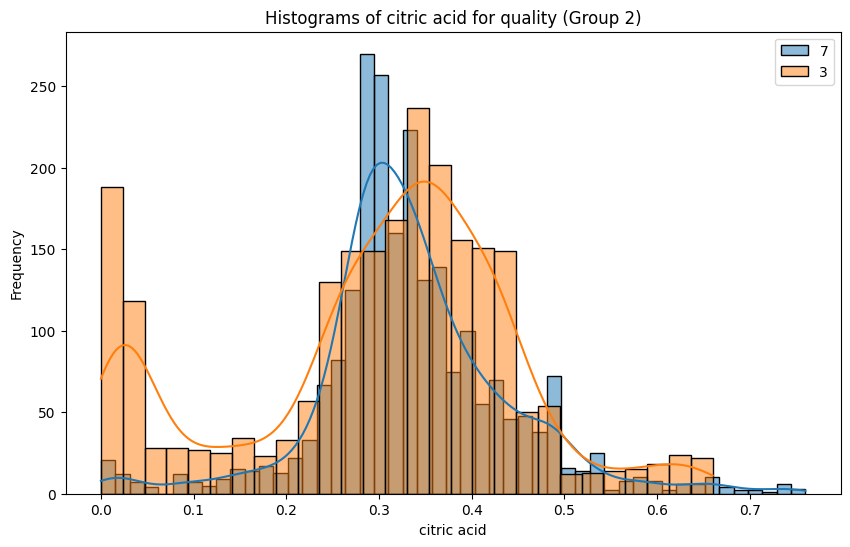

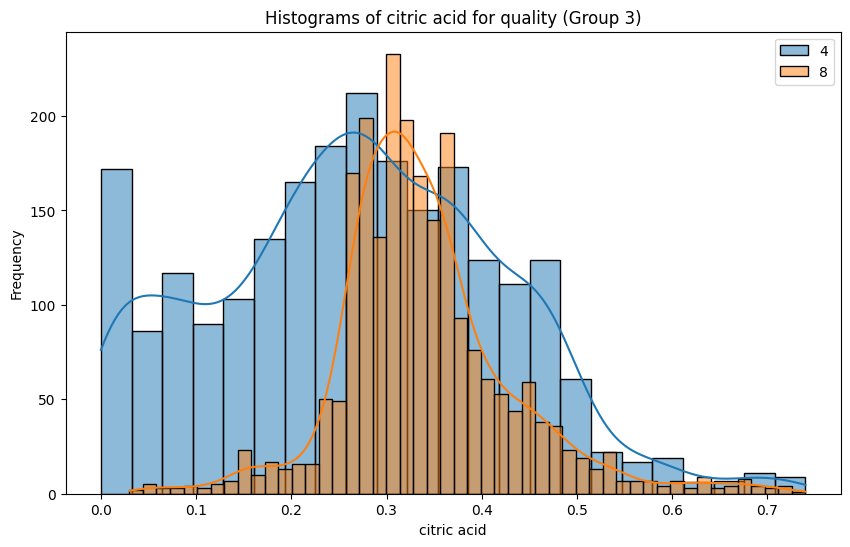

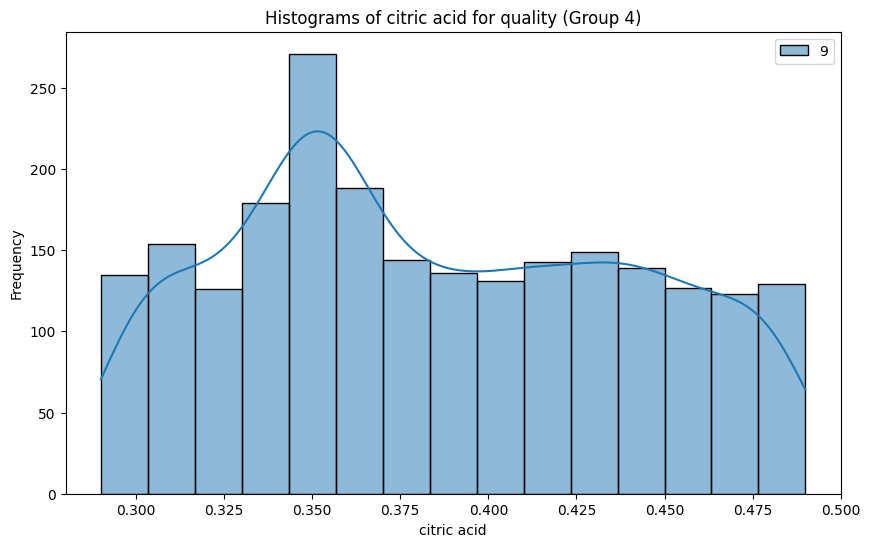

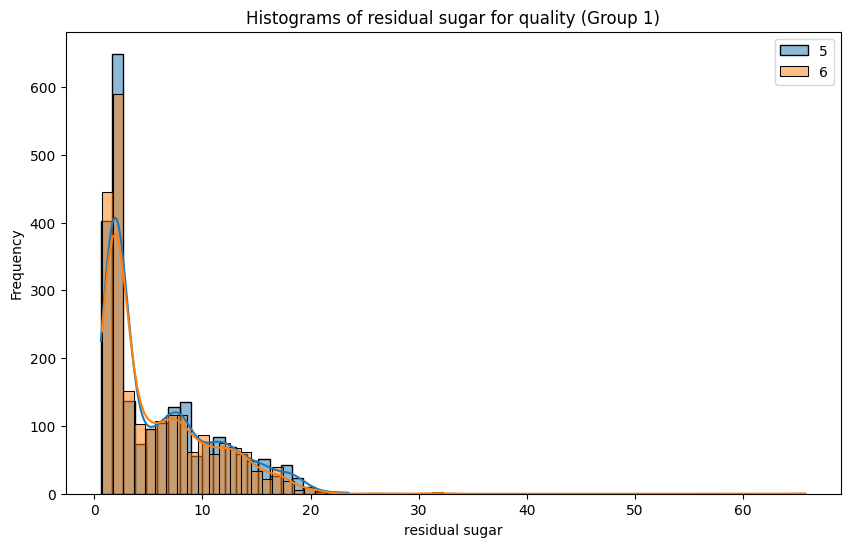

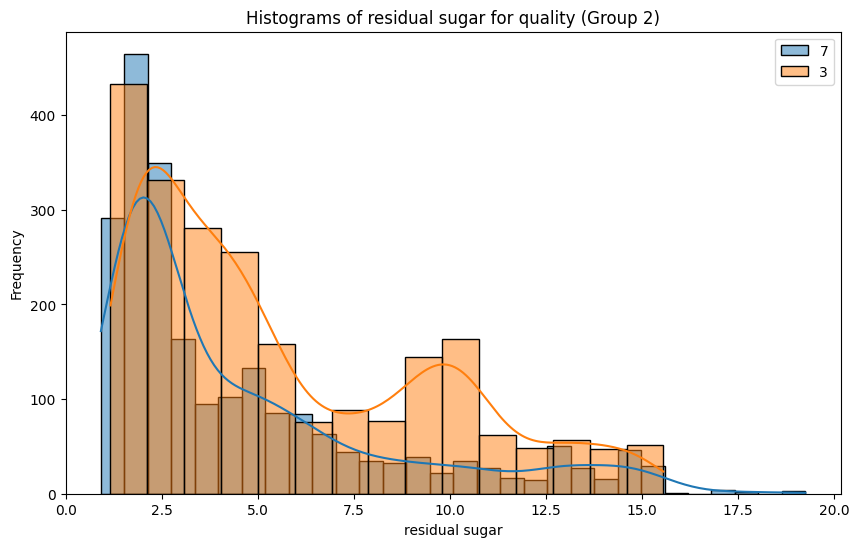

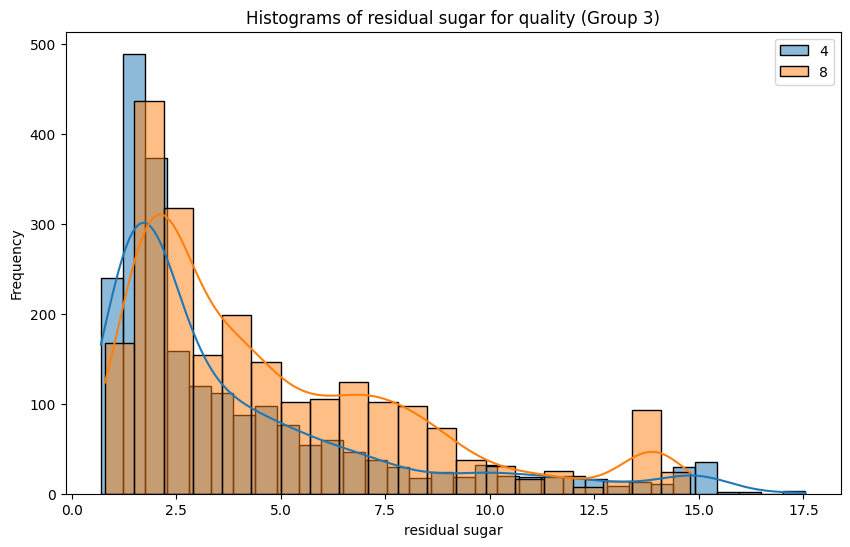

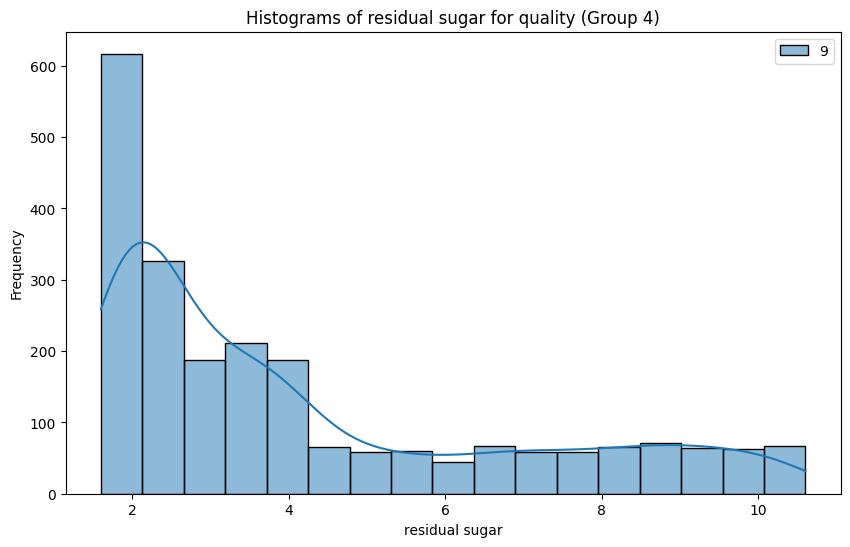

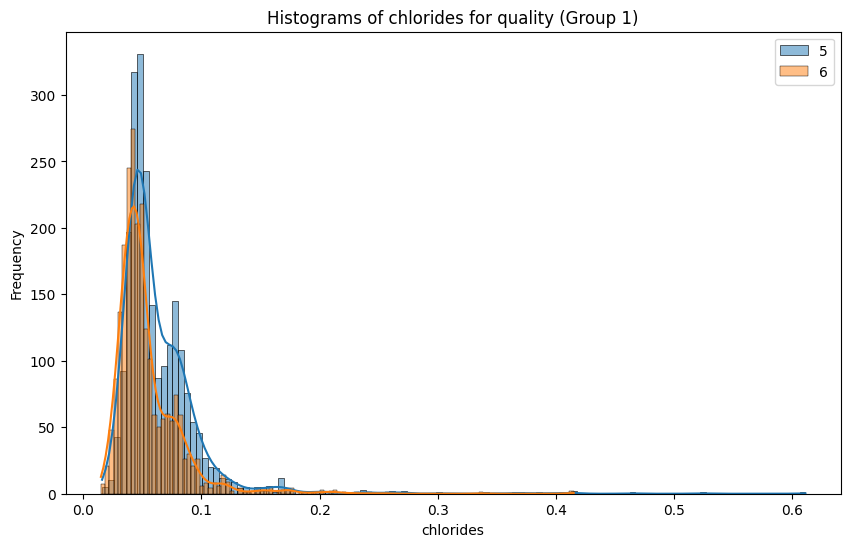

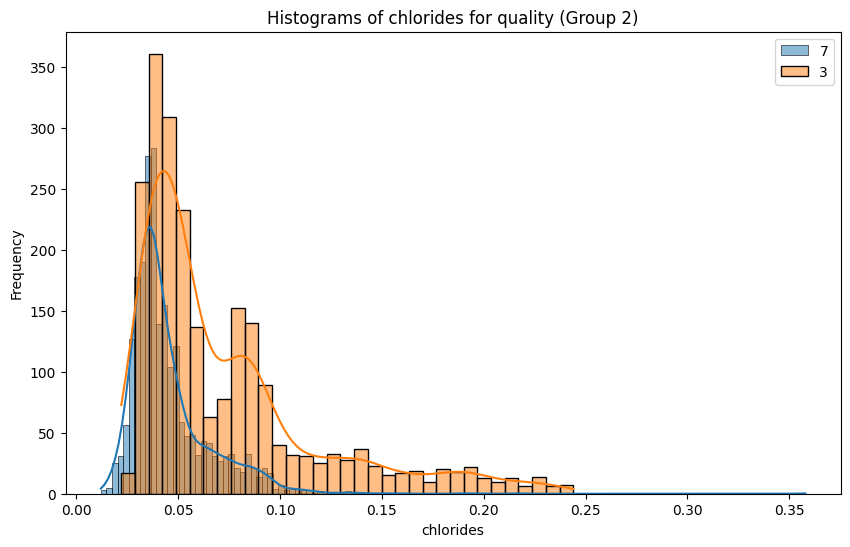

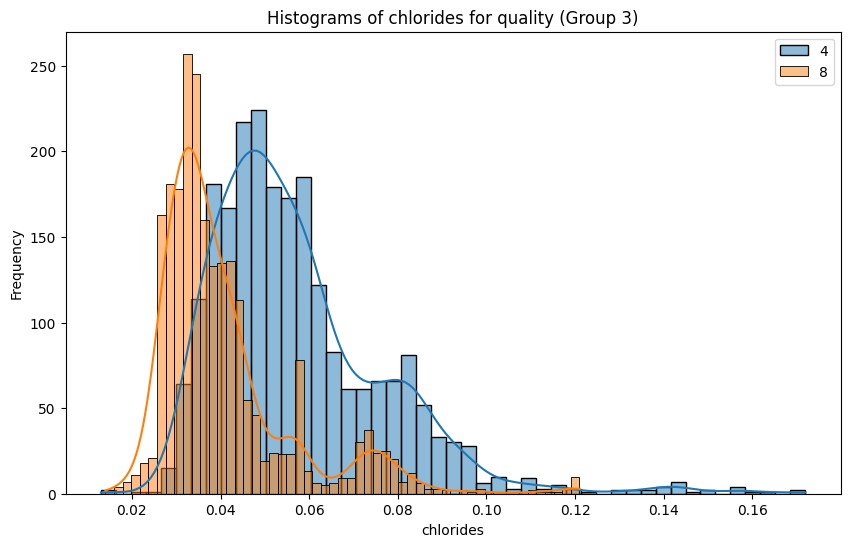

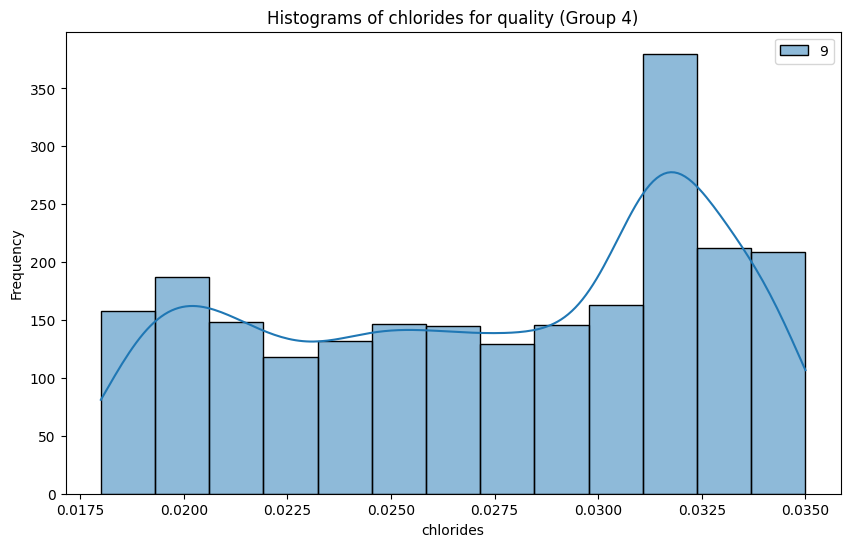

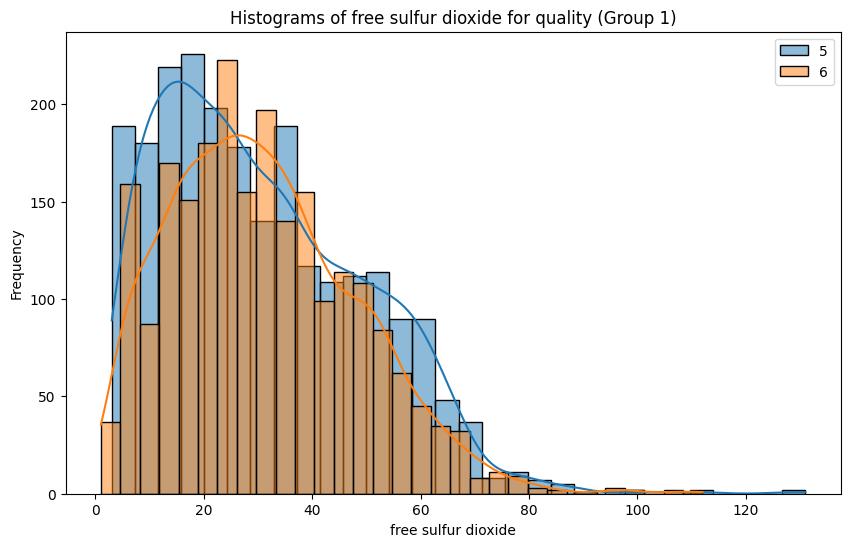

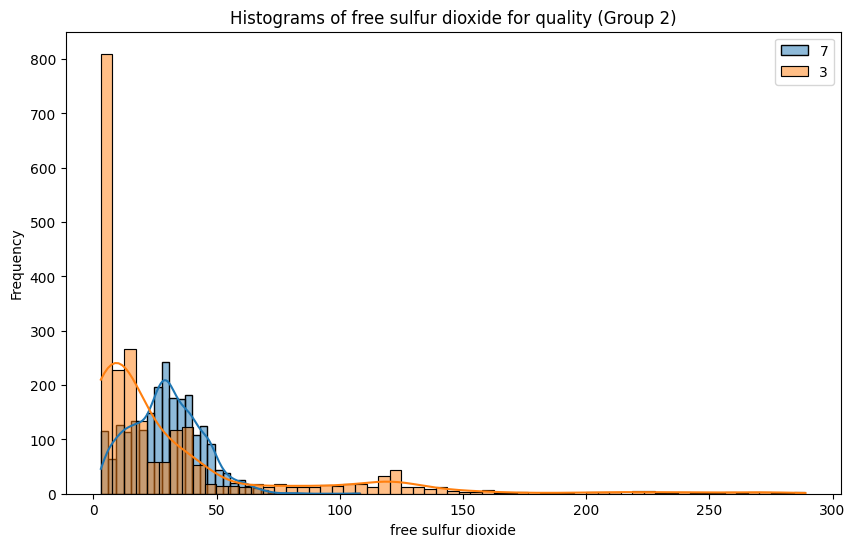

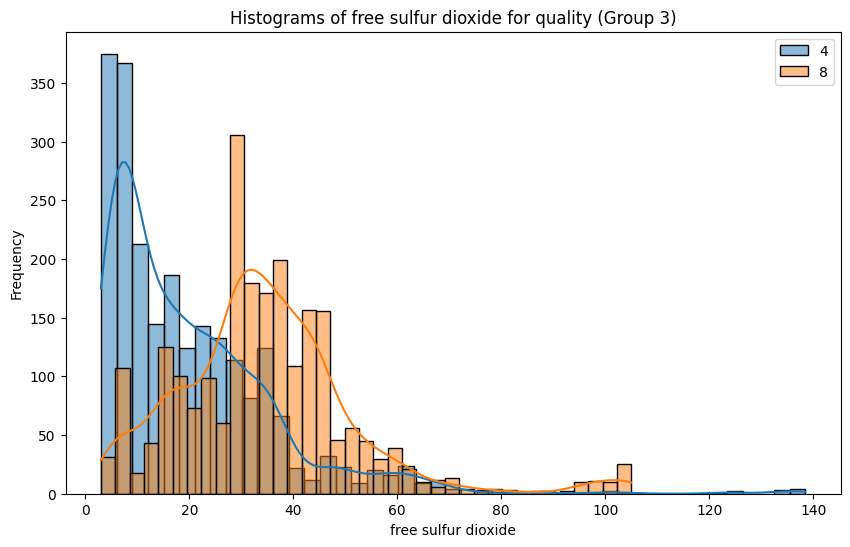

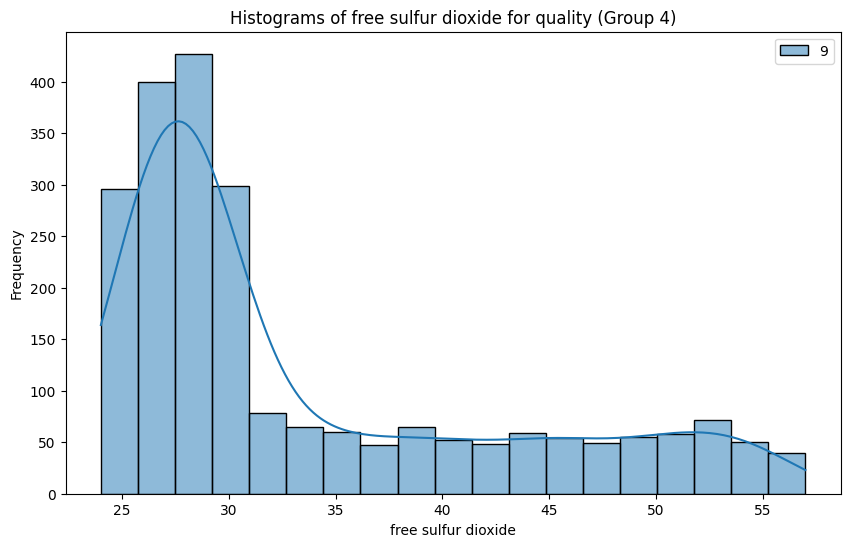

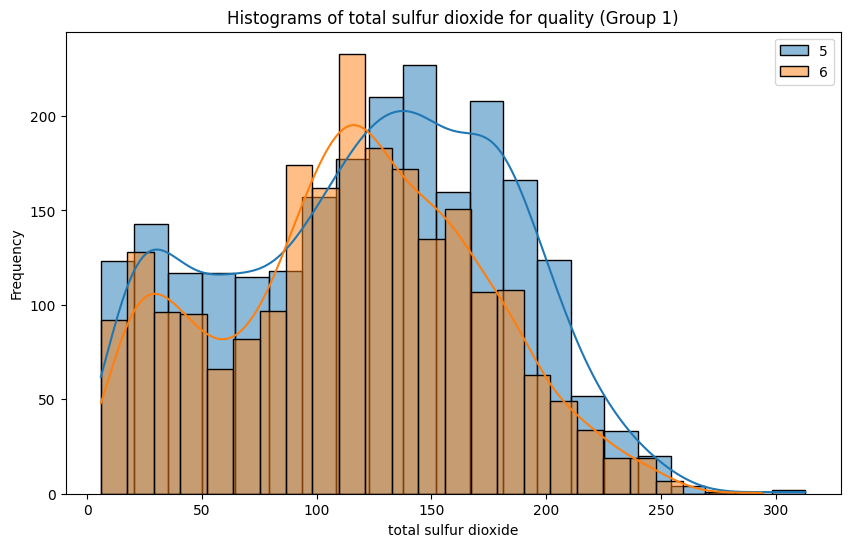

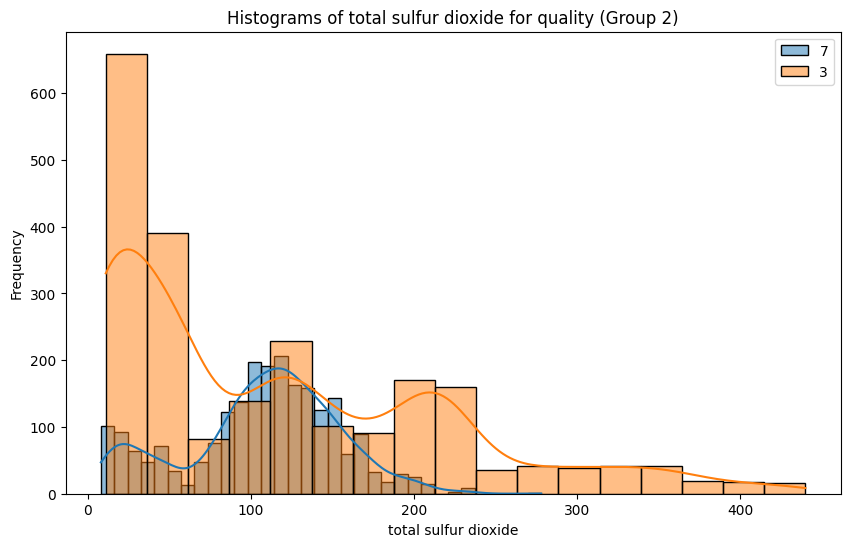

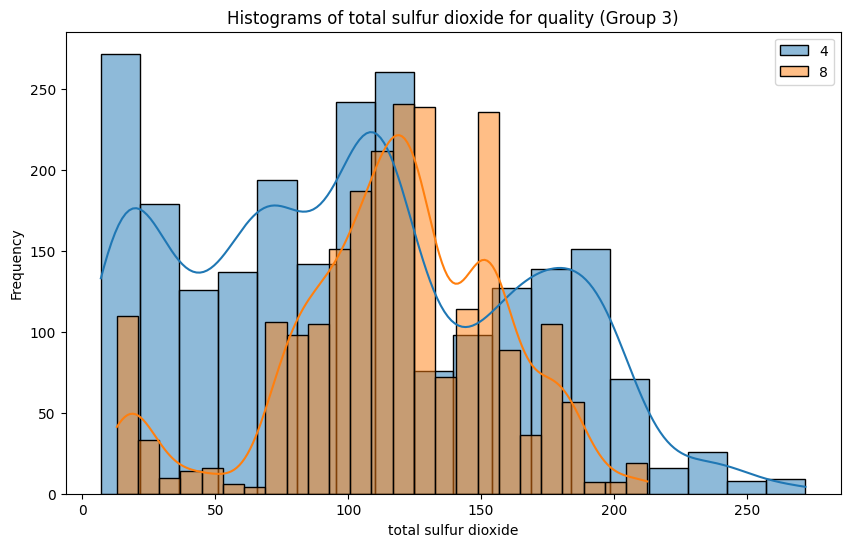

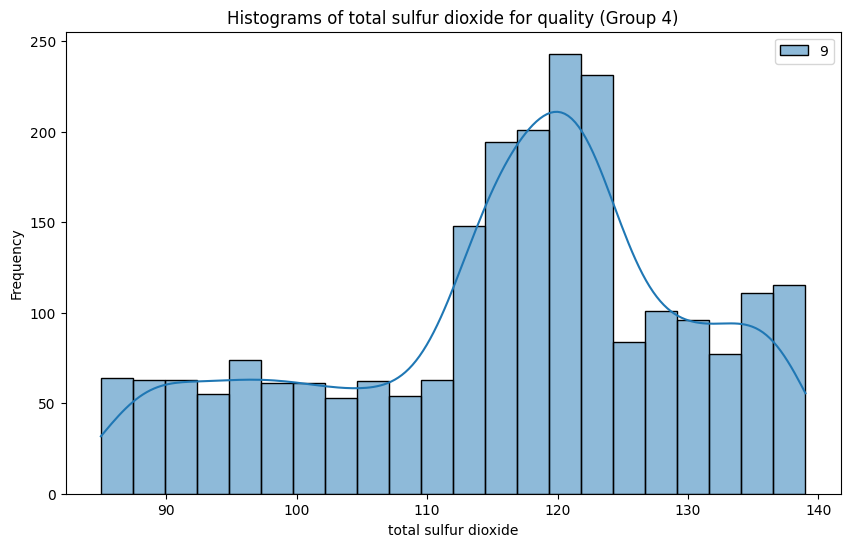

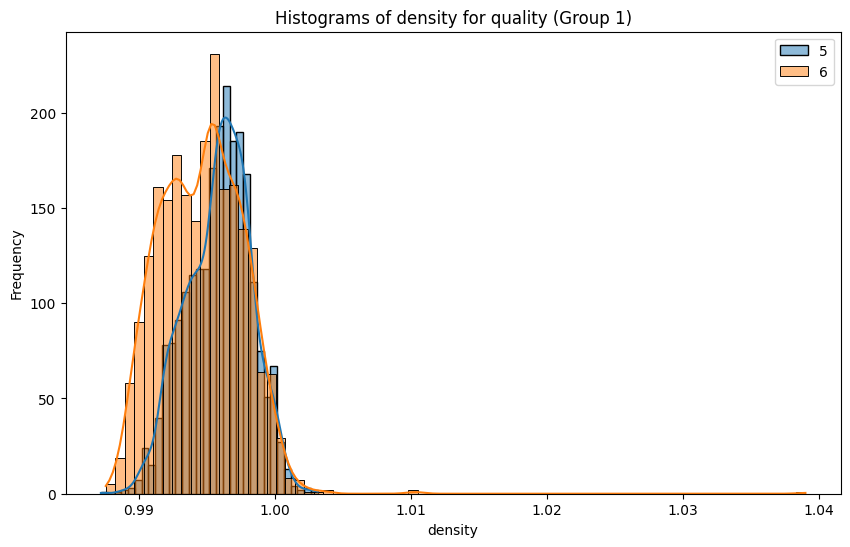

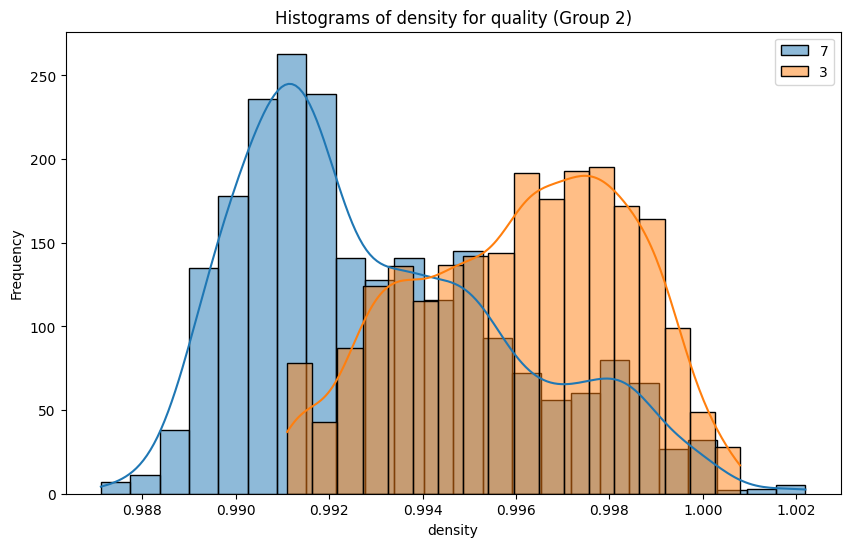

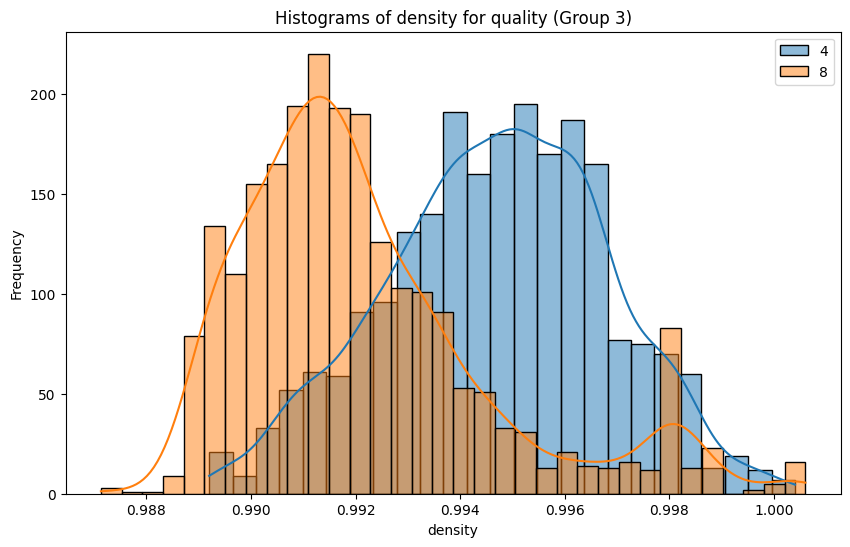

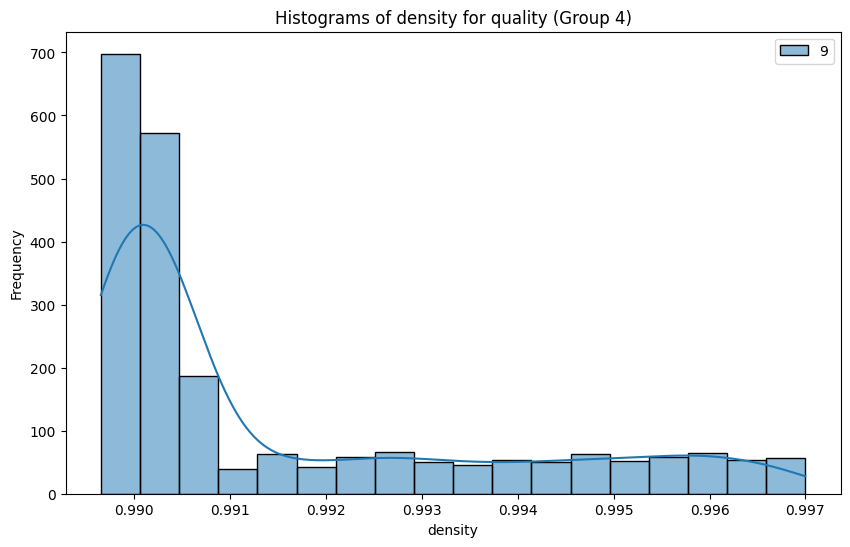

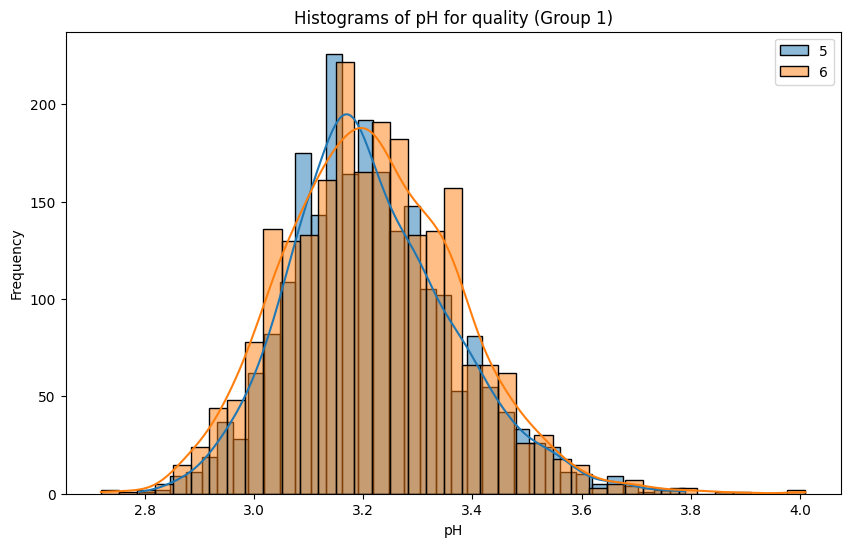

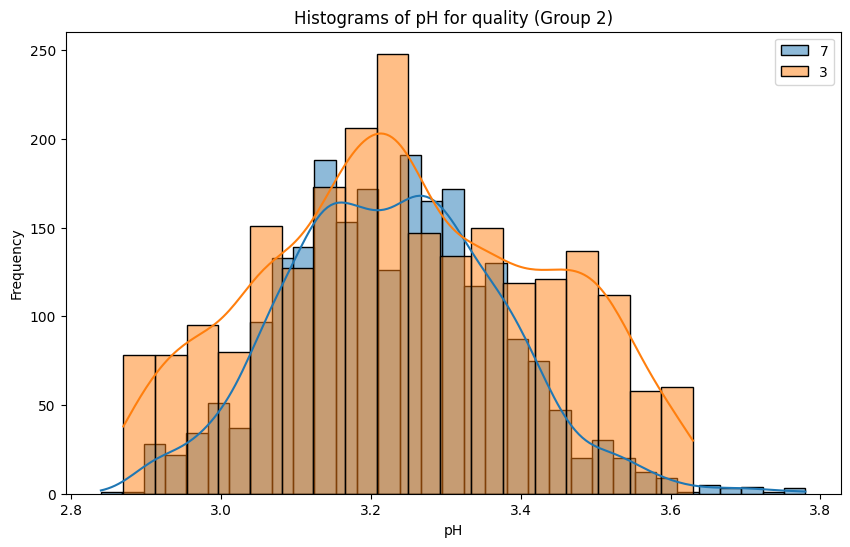

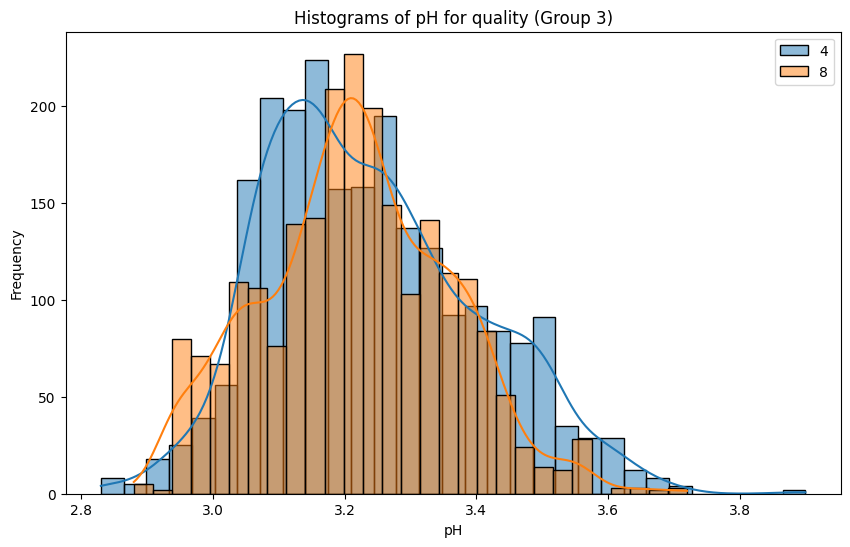

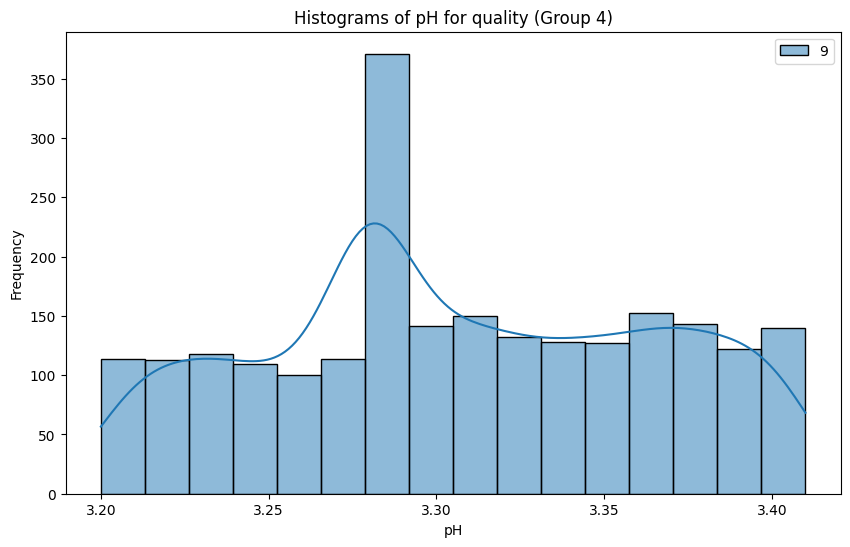

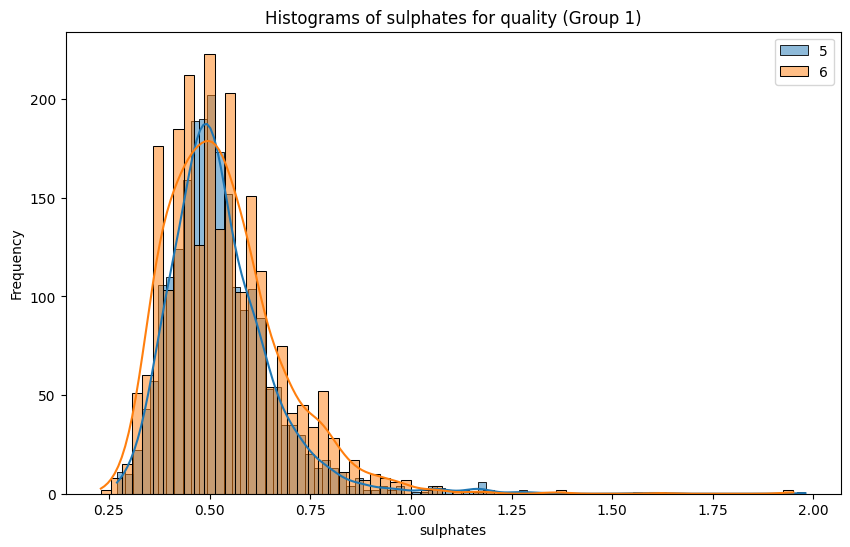

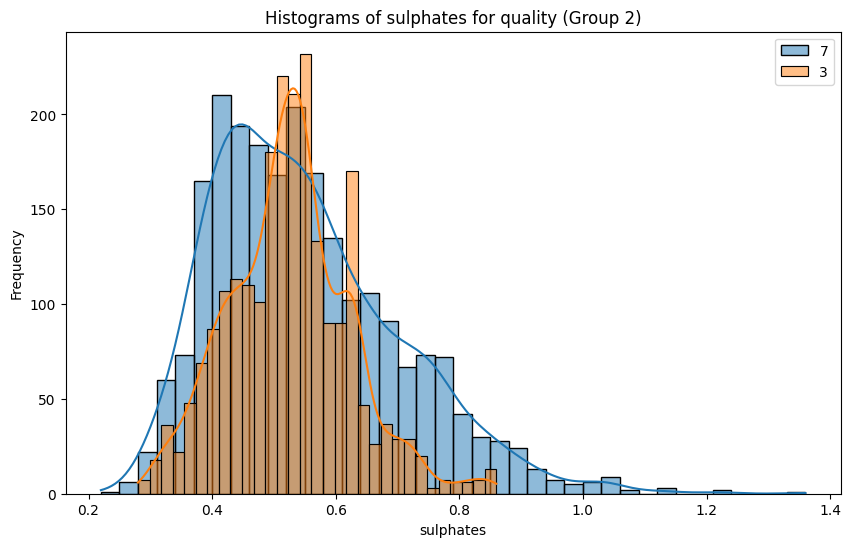

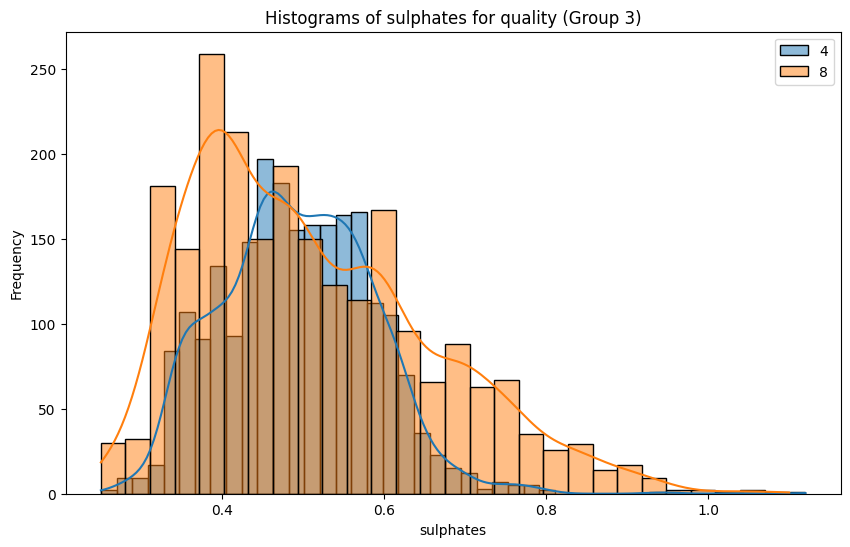

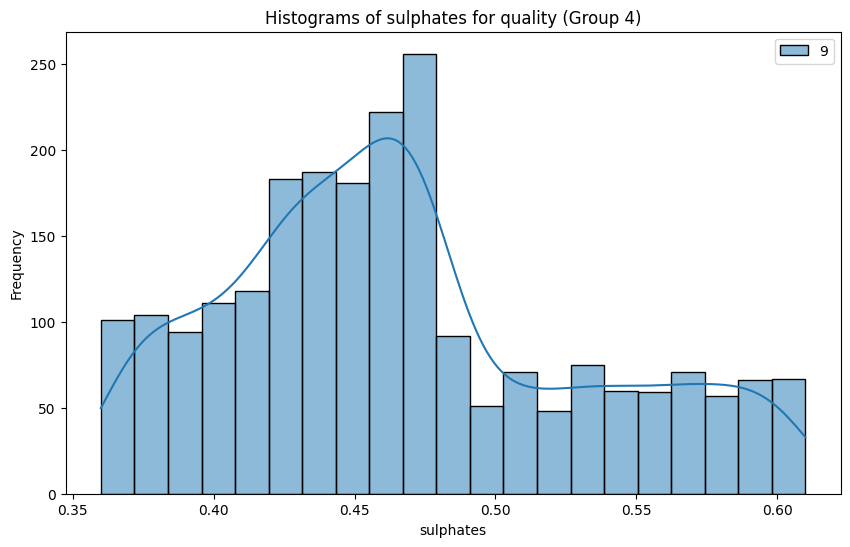

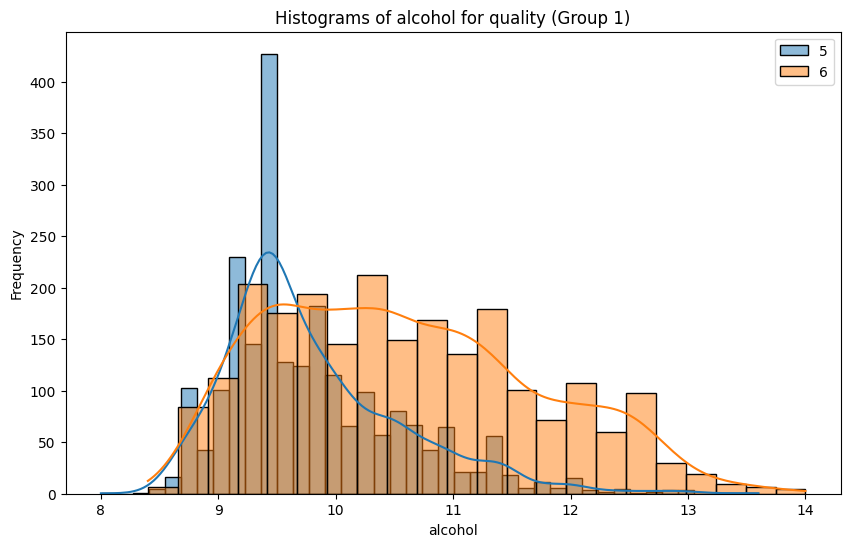

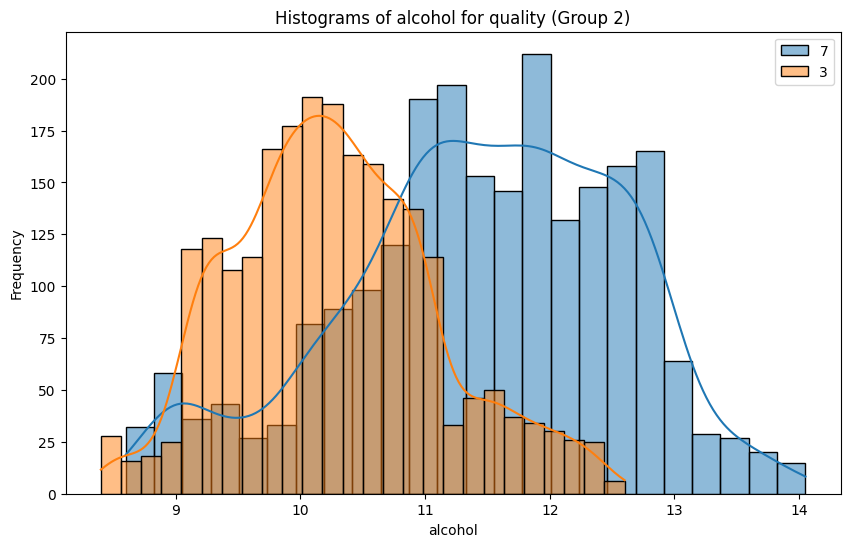

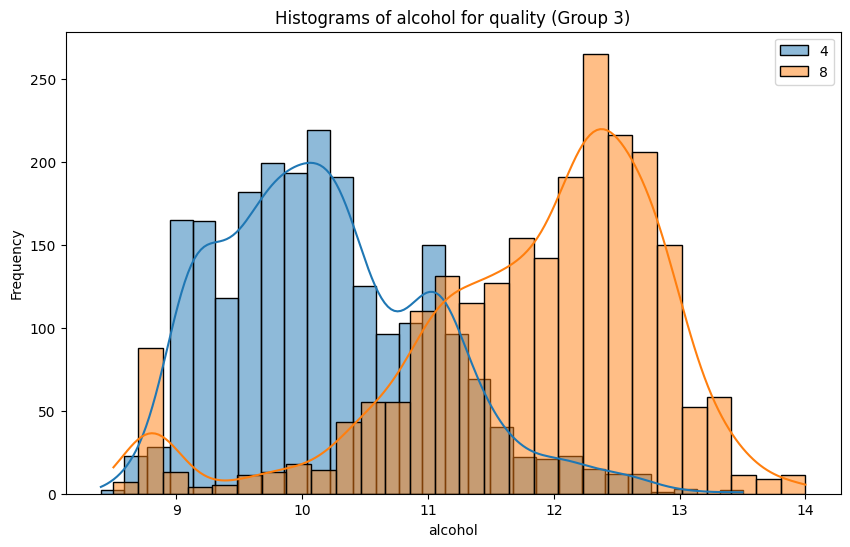

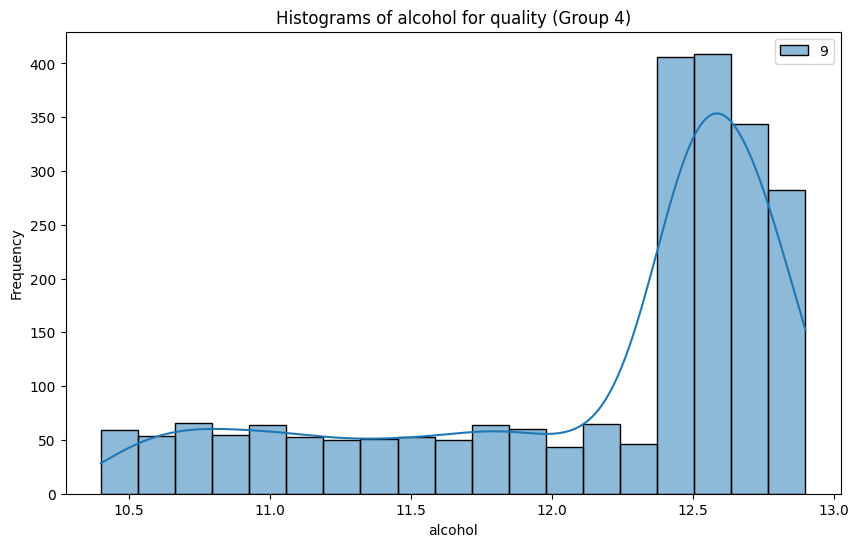

In [27]:
for i in range(len(features_num)):
    tk.plot_grouped_histograms(train_set_smote,"quality", features_num[i], 2)

*Hay relación entre el target y todas las variables numéricas*

In [28]:
# Comprobamos la colinealidad entre variables numéricas

criterio_col = 0.7
excluidas = []
corr_numeric = train_set_smote[features_num].corr(numeric_only = True)

for col in features_num:
    print(f"Comprobando colinealidad de {col}")
    if col not in excluidas:
        for col_2, valor_corr in corr_numeric[col].items():
            print(f"\tComprobando {col} con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"\t\t--> {col} correla con {col_2} al {valor_corr:0.4f}, EXCLUIMOS {col_2} <--")
                    excluidas.append(col_2)
                else:
                    print(f"\t\t{col} correla con {col_2} al {valor_corr:0.4f}, mantenemos {col_2}")
            elif col == col_2:
                print("\t\tSon la misma variable, no comprobamos")
    
    elif col in excluidas:
        print(f"\tLa columna {col} ya ha sido excluida")

excluidas = list(set(excluidas))
print("\nLas variables a excluir son", excluidas)

Comprobando colinealidad de fixed acidity
	Comprobando fixed acidity con fixed acidity
		Son la misma variable, no comprobamos
	Comprobando fixed acidity con volatile acidity
		fixed acidity correla con volatile acidity al 0.1655, mantenemos volatile acidity
	Comprobando fixed acidity con citric acid
		fixed acidity correla con citric acid al 0.3546, mantenemos citric acid
	Comprobando fixed acidity con residual sugar
		fixed acidity correla con residual sugar al -0.0085, mantenemos residual sugar
	Comprobando fixed acidity con chlorides
		fixed acidity correla con chlorides al 0.3017, mantenemos chlorides
	Comprobando fixed acidity con free sulfur dioxide
		fixed acidity correla con free sulfur dioxide al -0.2018, mantenemos free sulfur dioxide
	Comprobando fixed acidity con total sulfur dioxide
		fixed acidity correla con total sulfur dioxide al -0.2506, mantenemos total sulfur dioxide
	Comprobando fixed acidity con density
		fixed acidity correla con density al 0.5103, mantenemos de

In [29]:
# Excluimos las variables colineales de features_num

features_num.remove("total sulfur dioxide")
features_num.remove("alcohol")

In [30]:
features_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates']

<Axes: >

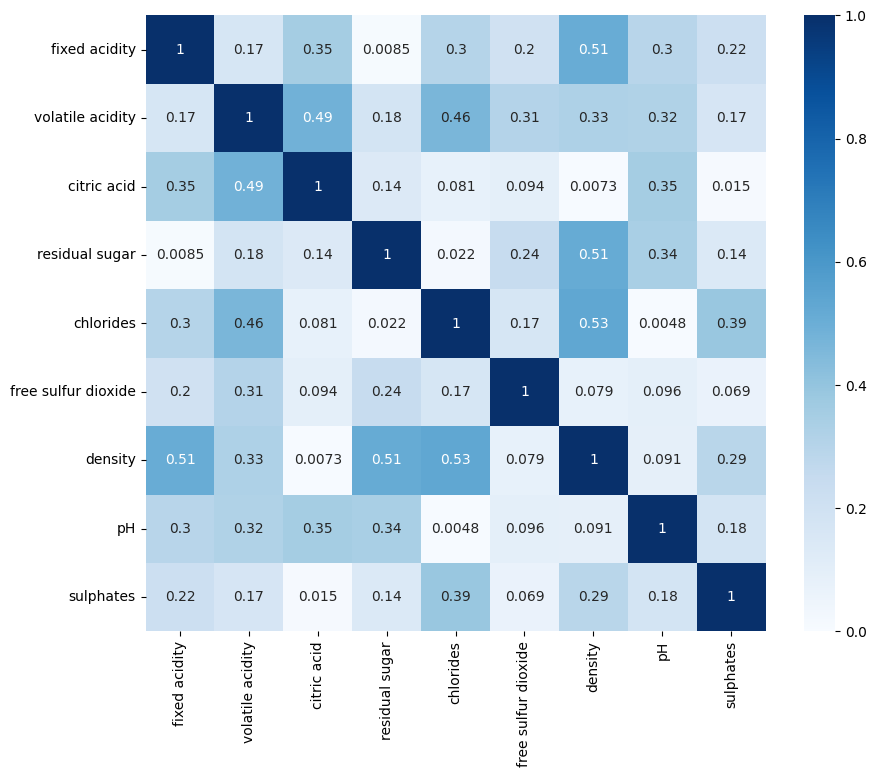

In [31]:
# Comprobamos las correlaciones entre las variables

plt.figure(figsize = (10,8))
sns.heatmap(np.abs(train_set_smote[features_num].corr(numeric_only = True)), annot = True, cmap = "Blues", vmin=0, vmax=1)

In [32]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [33]:
train_set_smote.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
count,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000
mean,7.313543,0.363953,0.322447,4.954324,0.051721,30.492097,113.251111,0.993994,3.238647,0.515095,10.897283,0.769318
std,1.204293,0.182563,0.131479,4.017043,0.031281,23.981957,60.191457,0.003007,0.151314,0.126819,1.257018,0.421283
min,3.900000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.600000,0.250000,0.261366,1.976306,0.033098,15.000000,77.000000,0.991360,3.137711,0.429990,9.814495,1.000000
50%,7.088648,0.309310,0.328360,3.300000,0.043150,27.829366,115.532314,0.993901,3.240000,0.498722,10.801871,1.000000
75%,7.795563,0.412671,0.399445,7.100000,0.059565,39.000000,145.865245,0.996343,3.340000,0.580000,12.014456,1.000000
max,15.500000,1.330000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.980000,14.050000,1.000000


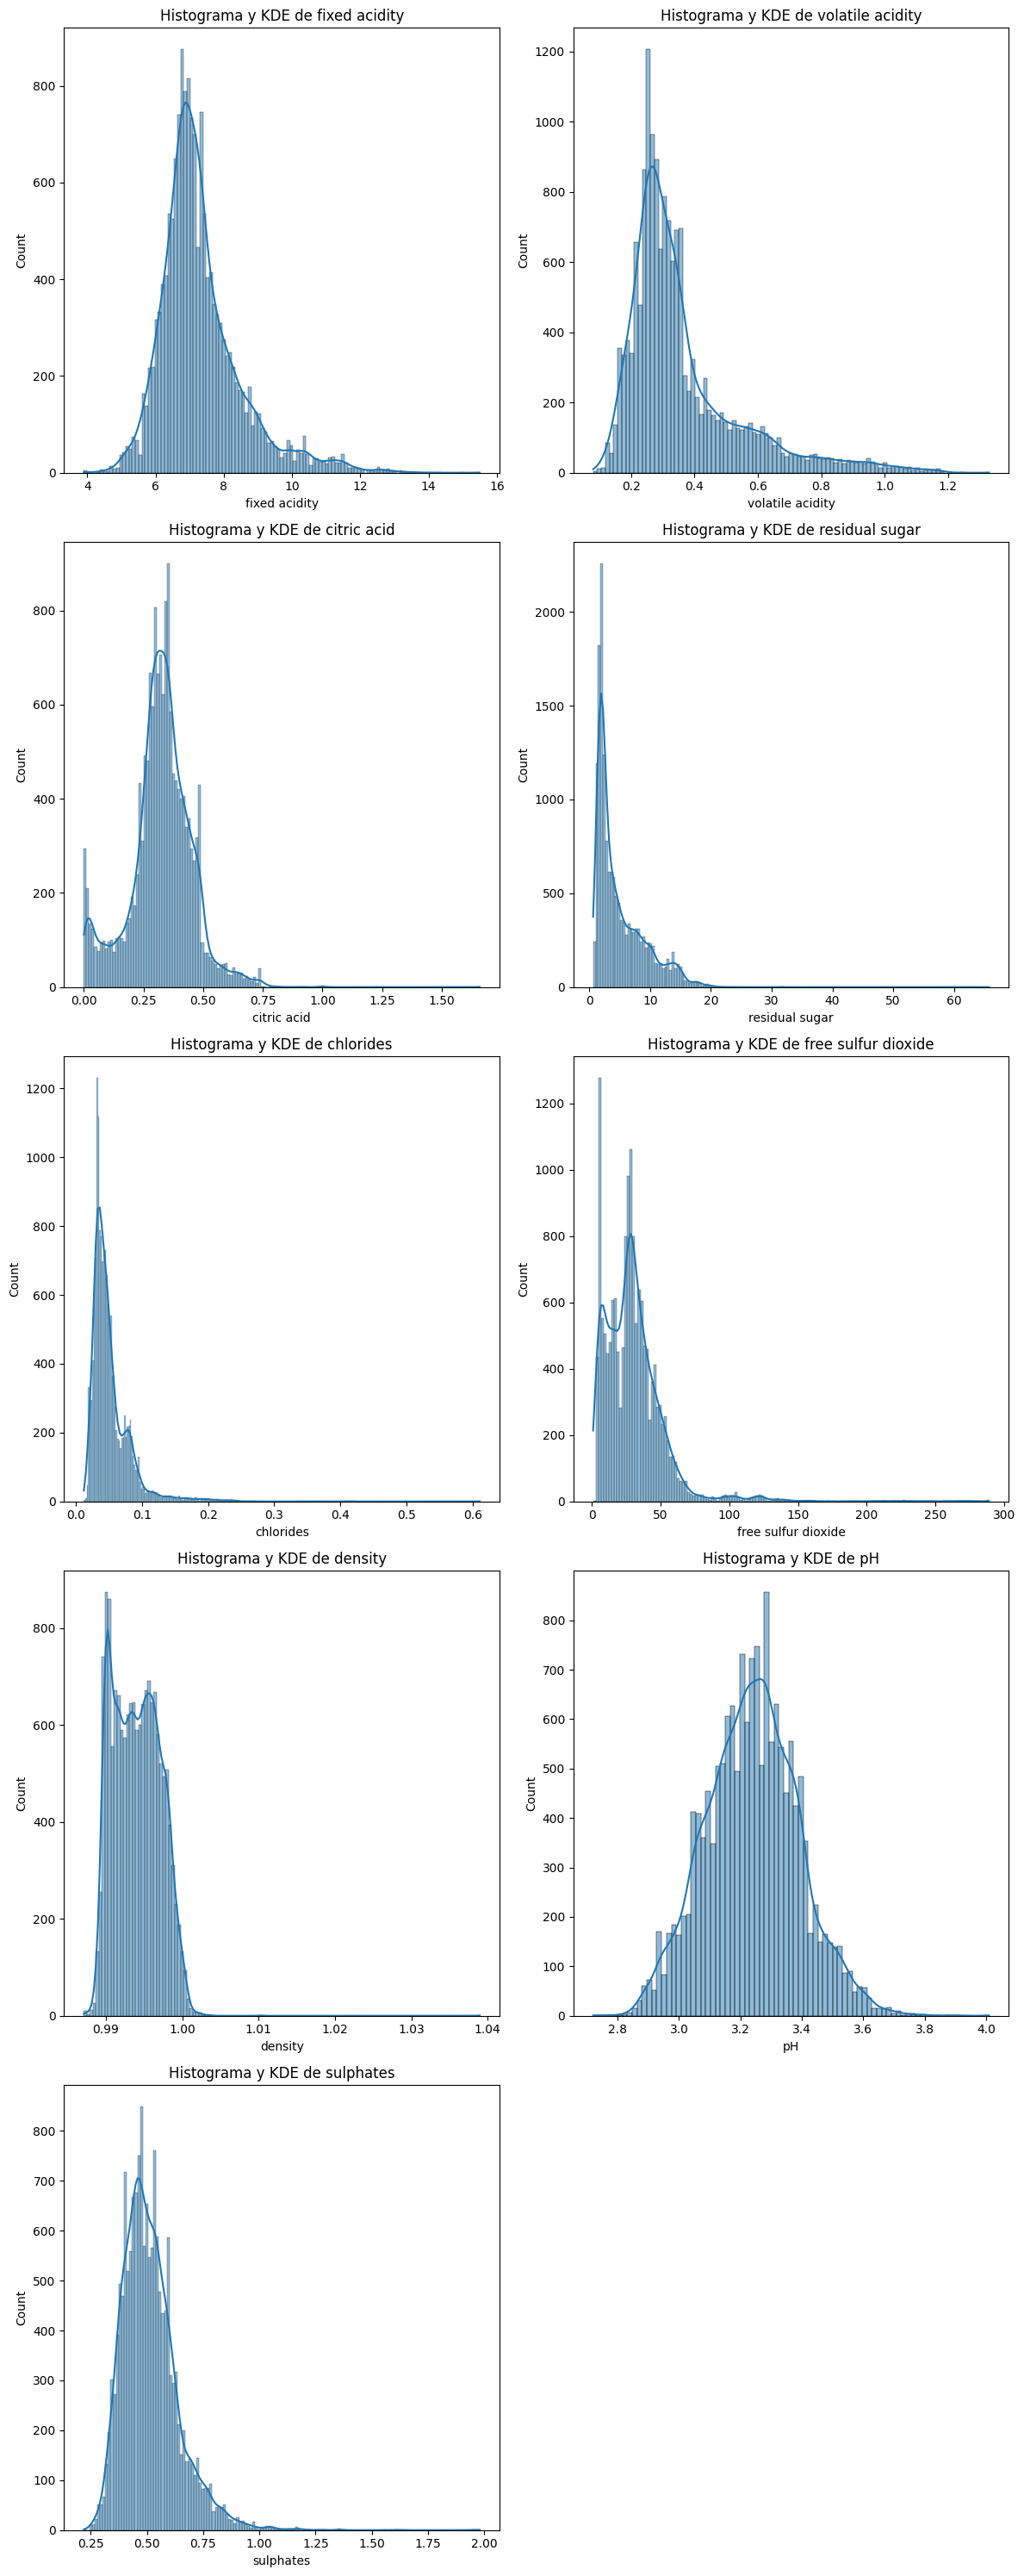

In [34]:
# Comprobamos la función de densidad de probabilidad para las diferentes variables numéricas 

plot_histo_den(train_set_smote, features_num)

*Intentamos aplicar el logaritmo a "volatile acidity", "residual sugar" y "chlorides"*

In [35]:
bck_train_set_smote = train_set_smote.copy()

In [36]:
train_set_smote = bck_train_set_smote

In [37]:
features_transform = ["volatile acidity", "residual sugar", "chlorides"]

In [38]:
for feature in features_transform:
    train_set_smote[feature] = train_set_smote[feature].apply(np.log)

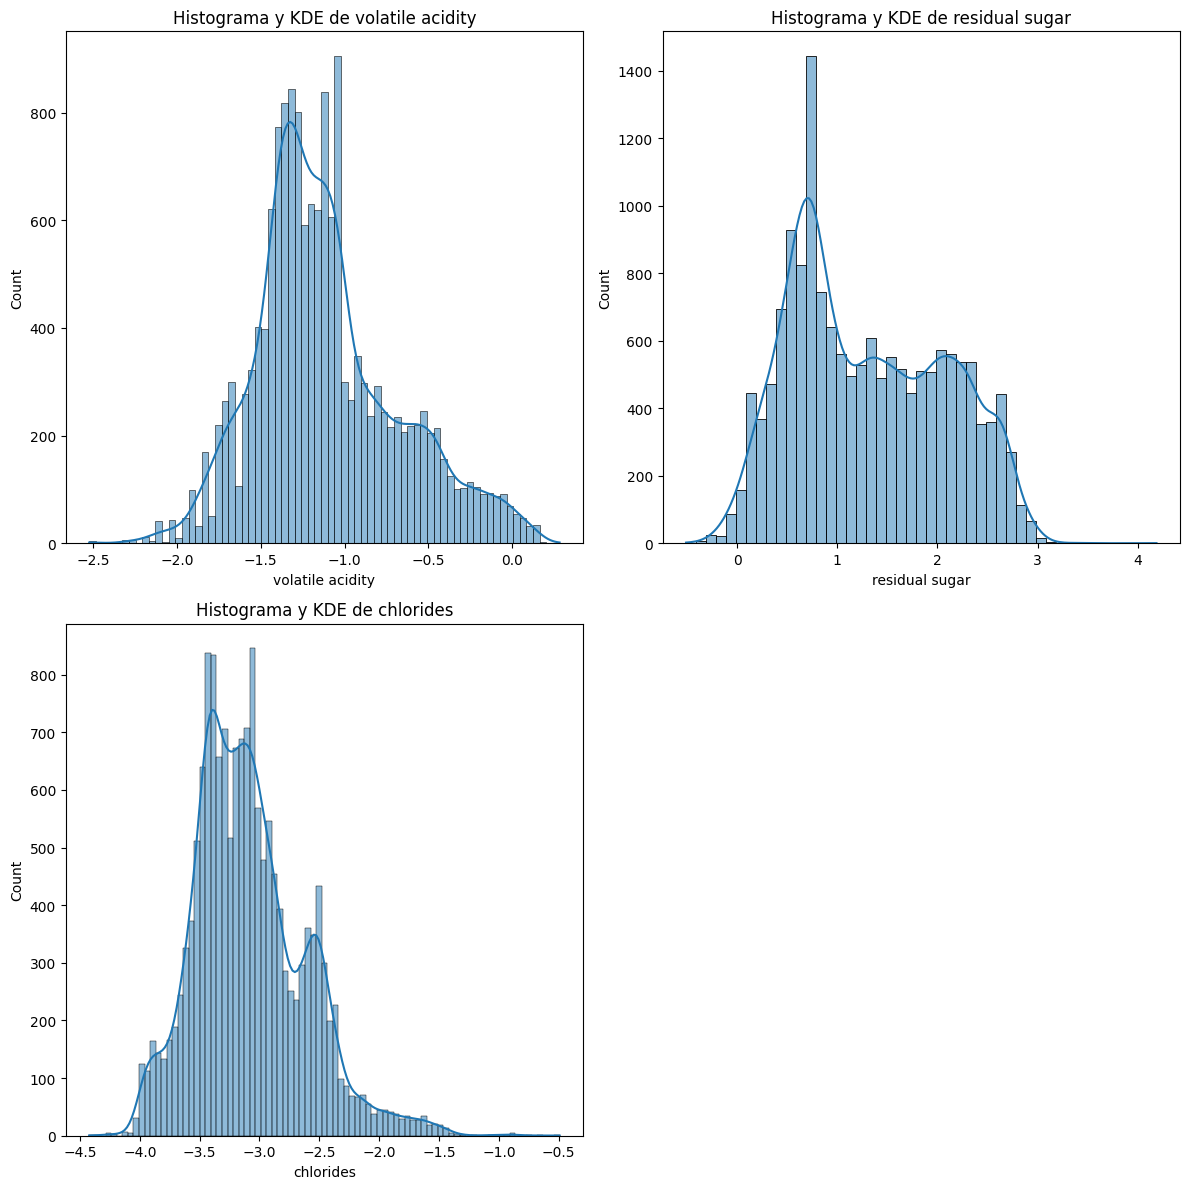

In [39]:
plot_histo_den(train_set_smote, features_transform)

*Parece que tienen mejor pinta que la con la distribución original*

In [40]:
features_all = features_num + features_cat # Estas son las variables que vamos a usar en nuestro modelo
features_all

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'class']

In [41]:
train_set_smote = train_set_smote[features_all]

In [42]:
train_set_smote.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,class
count,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000
mean,7.313543,-1.110244,0.322447,1.303488,-3.082464,30.492097,0.993994,3.238647,0.515095,0.769318
std,1.204293,0.428344,0.131479,0.765048,0.462489,23.981957,0.003007,0.151314,0.126819,0.421283
min,3.900000,-2.525729,0.000000,-0.510826,-4.422849,1.000000,0.987110,2.720000,0.220000,0.000000
25%,6.600000,-1.386294,0.261366,0.681230,-3.408272,15.000000,0.991360,3.137711,0.429990,1.000000
50%,7.088648,-1.173412,0.328360,1.193922,-3.143066,27.829366,0.993901,3.240000,0.498722,1.000000
75%,7.795563,-0.885104,0.399445,1.960095,-2.820691,39.000000,0.996343,3.340000,0.580000,1.000000
max,15.500000,0.285179,1.660000,4.186620,-0.492658,289.000000,1.038980,4.010000,1.980000,1.000000


In [43]:
train_set_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15918 entries, 0 to 15917
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        15918 non-null  float64
 1   volatile acidity     15918 non-null  float64
 2   citric acid          15918 non-null  float64
 3   residual sugar       15918 non-null  float64
 4   chlorides            15918 non-null  float64
 5   free sulfur dioxide  15918 non-null  float64
 6   density              15918 non-null  float64
 7   pH                   15918 non-null  float64
 8   sulphates            15918 non-null  float64
 9   class                15918 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.2 MB


In [44]:
features = train_set_smote.columns

In [45]:
# Escalamos las numéricas

scaler = StandardScaler()

scaler.fit(train_set_smote[features]) # Entreno solo con datos de train. Todas las variables ya están convertidas a numéricas

StandardScaler()

In [46]:
# Aplico escalado al set de train

train_set_smote[features] = scaler.transform(train_set_smote[features])

C:\Users\ancar\AppData\Local\Temp\ipykernel_11224\3465619041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set_smote[features] = scaler.transform(train_set_smote[features])


In [47]:
train_set_smote.describe() # Ahora la desviación estándar (std) de todas las numéricas de train es 1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,class
count,1.591800e+04,1.591800e+04,1.591800e+04,1.591800e+04,1.591800e+04,1.591800e+04,1.591800e+04,1.591800e+04,1.591800e+04,1.591800e+04
mean,-2.999653e-16,-1.428406e-16,5.570784e-16,-7.142030e-17,-9.998842e-16,9.731016e-17,-1.054164e-14,2.785392e-16,3.285334e-16,4.285218e-17
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-2.834568e+00,-3.304658e+00,-2.452533e+00,-2.371577e+00,-2.898290e+00,-1.229800e+00,-2.289352e+00,-3.427716e+00,-2.326972e+00,-1.826189e+00
25%,-5.925179e-01,-6.444803e-01,-4.645787e-01,-8.133839e-01,-7.044890e-01,-6.460100e-01,-8.760848e-01,-6.670775e-01,-6.710951e-01,5.475884e-01
50%,-1.867501e-01,-1.474751e-01,4.497536e-02,-1.432186e-01,-1.310392e-01,-1.110341e-01,-3.110433e-02,8.944703e-03,-1.291081e-01,5.475884e-01
75%,4.002639e-01,5.256217e-01,5.856493e-01,8.582820e-01,5.660253e-01,3.547738e-01,7.811827e-01,6.698410e-01,5.118063e-01,5.475884e-01
max,6.797943e+00,3.257821e+00,1.017343e+01,3.768680e+00,5.599889e+00,1.077960e+01,1.495974e+01,5.097847e+00,1.155150e+01,5.475884e-01


#### APLICAMOS TODO LO REALIZADO AL TEST_SET

In [48]:
for feature in features_transform:
    test_set[feature] = test_set[feature].apply(np.log)

In [49]:
test_set[features_all] = scaler.transform(test_set[features_all])

In [50]:
X_test = test_set[features_all]

#### CONSTRUIMOS LOS MODELOS

In [51]:
bck_train_set_smote_1 = train_set_smote.copy()

In [52]:
train_set_smote = bck_train_set_smote_1

In [53]:
# Ahora creamos las variables X,y para los datos de entrenamiento tras todo el trabajo previo

X = train_set_smote.copy()
y = y_train_smote.copy()

In [54]:
# Convertimos los valores de "quality" en lugar de empezar de 3 a 9, a empezar de 0 a 6 (le afecta al modelo XGBoost)

y_boost = y.copy()
y_test_boost = y_test.copy()

In [55]:
y_boost.replace({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6}, inplace = True)
y_test_boost.replace({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6}, inplace = True)

##### Comparación con Validación Cruzada (pre-optimización)

In [56]:
model_names = ["KNN_3", "KNN_5", "Logistic Regression", "DecisionTree", "Random Forest", "XGBoost", "LightGBM"]

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
lr_clf = LogisticRegression(max_iter = 10000)
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)

model_set = [knn_3, knn_5, lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf]

In [57]:
metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X, y_boost, cv = 5, scoring = "recall_macro")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X, y_boost, cv = 5, scoring = "recall_macro")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier()
LogisticRegression(max_iter=10000)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)


In [58]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Recall_macro: {np.mean(valores)}")
print("--------------------")
print(f"El ganador es {ganador}")

Model <KNN_3>, Recall_macro: 0.8140512728303791
Model <KNN_5>, Recall_macro: 0.7935702183279275
Model <Logistic Regression>, Recall_macro: 0.5083617452402851
Model <DecisionTree>, Recall_macro: 0.7801846485798658
Model <Random Forest>, Recall_macro: 0.8695241322554098
Model <XGBoost>, Recall_macro: 0.8518673019868741
Model <LightGBM>, Recall_macro: 0.8458330970476974
--------------------
El ganador es Random Forest


*Nos quedaremos con el RandomForestClassifier, ya que es el que mejor resultados nos ha dado con el cros-validation. A continuación, vamos a hacer un GridSearch para encontrar los mejores parámetros para este modelo*

#### OPTIMIZACIÓN DE HIPERPARÁMETROS

In [59]:
params_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    "min_samples_leaf": [10,20,40],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1]
}

rf_grid = GridSearchCV(rf_clf,
                       param_grid= params_grid,
                       cv = 5,
                       scoring = "recall_macro",
                       n_jobs = -1)

rf_grid.fit(X, y_boost)

c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.3, 0.6, 1],
                         'min_samples_leaf': [10, 20, 40],
                         'n_estimators': [100, 200, 400]},
             scoring='recall_macro')

In [60]:
rf_grid.best_score_

0.7291779334573544

In [61]:
rf_grid.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.6,
 'min_samples_leaf': 10,
 'n_estimators': 400}

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2274
           1       0.75      0.88      0.81      2274
           2       0.62      0.65      0.64      2274
           3       0.65      0.42      0.51      2274
           4       0.74      0.73      0.74      2274
           5       0.86      0.92      0.89      2274
           6       0.98      1.00      0.99      2274

    accuracy                           0.80     15918
   macro avg       0.79      0.80      0.79     15918
weighted avg       0.79      0.80      0.79     15918



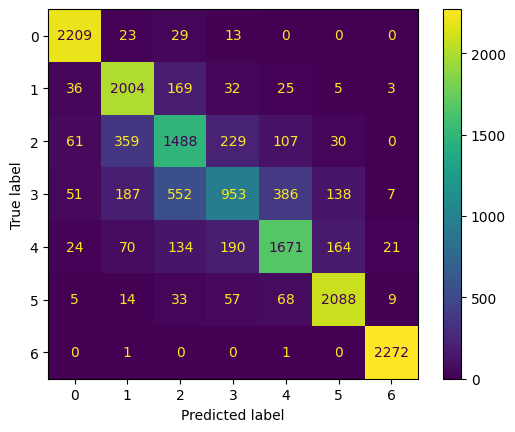

In [63]:
tk.metrics_evaluation(rf_grid, X, y_boost)

c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.13      0.44      0.20        43
           2       0.58      0.56      0.57       432
           3       0.63      0.32      0.43       562
           4       0.39      0.53      0.45       210
           5       0.22      0.55      0.31        47
           6       0.00      0.00      0.00         0

    accuracy                           0.45      1300
   macro avg       0.28      0.34      0.28      1300
weighted avg       0.54      0.45      0.47      1300



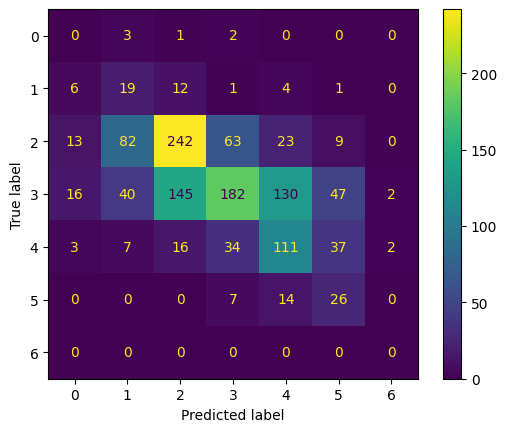

In [64]:
tk.metrics_evaluation(rf_grid, X_test, y_test_boost)

*Aunque tanto en el cross-validation como en los datos de train las métricas son bastante buenas, las métricas obtenidas con los datos de test no son nada buenas (34% de recall medio)*

#### ANÁLISIS DE ERRORES

In [65]:
y_test_boost_pred = rf_grid.predict(X_test)

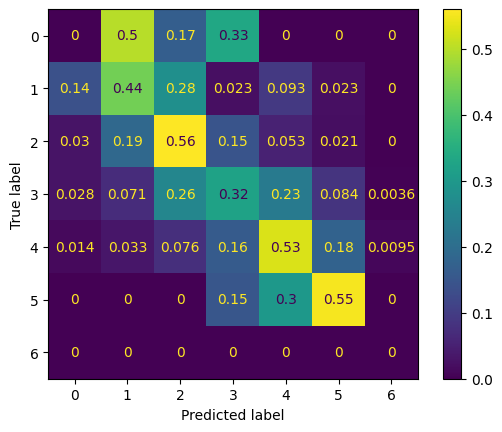

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test_boost, y_test_boost_pred, normalize= "true") # normalize a true muestra el recall

*Tras comprobar el análisis de errores, se podrían agrupar las calidades de vino en 3 categorías: 3-4, 5-6, 7-9. Esto podría mejorar los resultados obtenidos*

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

En cuanto a la variable target para la parte de regresión, ésta sería *"alcohol"*. La comprobamos visualmente

In [117]:
target_reg = "alcohol"

<Axes: xlabel='alcohol', ylabel='Count'>

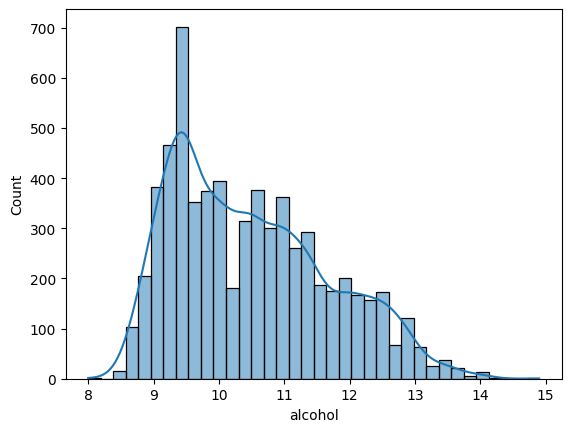

In [118]:
# Comprobamos la distribución de la variable target

sns.histplot(df[target_reg], kde = True)

In [119]:
train_set_reg = train_set.copy()
test_set_reg = test_set.copy()

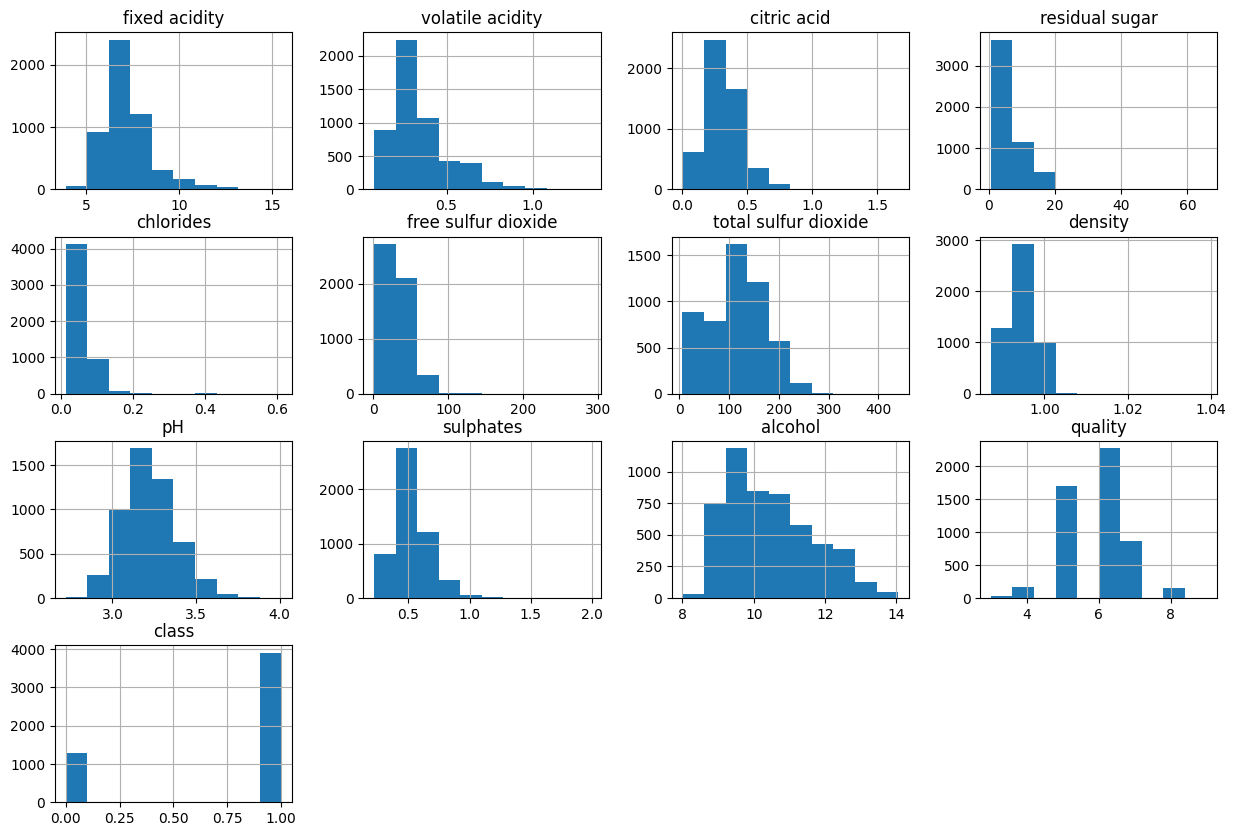

In [120]:
train_set_reg.hist(figsize=(15, 10));

In [121]:
features_num_reg = train_set_reg.columns

In [122]:
corr_matrix = train_set_reg.corr(numeric_only= True)
corr_matrix_abs = corr_matrix["alcohol"].abs().sort_values(ascending = False)
corr_matrix_abs

COL_N
alcohol                 1.000000
density                 0.682345
quality                 0.450403
residual sugar          0.357459
total sulfur dioxide    0.272970
chlorides               0.260508
free sulfur dioxide     0.188460
pH                      0.116497
fixed acidity           0.091964
volatile acidity        0.036041
class                   0.026966
citric acid             0.005690
sulphates               0.000412
Name: alcohol, dtype: float64

In [123]:
# Vamos a eliminar las columnas con correlación < 0.1 en train_set_reg (luego habrá que hacerlo en test_set_reg)

criterio = 0.1 # Fijamos un criterio para seleccionar nuestras features numéricas

features_num_reg = corr_matrix_abs[corr_matrix_abs > criterio].index.to_list()
features_num_reg.remove(target_reg) # Quitamos el target

In [124]:
features_num_reg

['density',
 'quality',
 'residual sugar',
 'total sulfur dioxide',
 'chlorides',
 'free sulfur dioxide',
 'pH']

In [125]:
# Comprobamos la colinealidad

criterio_col = 0.7
excluidas = []
corr_numeric = train_set_reg[features_num_reg].corr(numeric_only = True)

for col in features_num_reg:
    print(f"Comprobando colinealidad de {col}")
    if col not in excluidas:
        for col_2, valor_corr in corr_numeric[col].items():
            print(f"\tComprobando {col} con {col_2}")
            if col != col_2 and col_2 in features_num_reg:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"\t\t--> {col} correla con {col_2} al {valor_corr:0.4f}, EXCLUIMOS {col_2} <--")
                    excluidas.append(col_2)
                else:
                    print(f"\t\t{col} correla con {col_2} al {valor_corr:0.4f}, mantenemos {col_2}")
            elif col == col_2:
                print("\t\tSon la misma variable, no comprobamos")
    
    elif col in excluidas:
        print(f"\tLa columna {col} ya ha sido excluida")

excluidas = list(set(excluidas))
print("\nLas variables a excluir son", excluidas)

Comprobando colinealidad de density
	Comprobando density con density
		Son la misma variable, no comprobamos
	Comprobando density con quality
		density correla con quality al -0.3051, mantenemos quality
	Comprobando density con residual sugar
		density correla con residual sugar al 0.5553, mantenemos residual sugar
	Comprobando density con total sulfur dioxide
		density correla con total sulfur dioxide al 0.0343, mantenemos total sulfur dioxide
	Comprobando density con chlorides
		density correla con chlorides al 0.3687, mantenemos chlorides
	Comprobando density con free sulfur dioxide
		density correla con free sulfur dioxide al 0.0304, mantenemos free sulfur dioxide
	Comprobando density con pH
		density correla con pH al 0.0184, mantenemos pH
Comprobando colinealidad de quality
	Comprobando quality con density
		quality correla con density al -0.3051, mantenemos density
	Comprobando quality con quality
		Son la misma variable, no comprobamos
	Comprobando quality con residual sugar
		

In [126]:
features_num_reg.remove("free sulfur dioxide")

<Axes: xlabel='COL_N', ylabel='COL_N'>

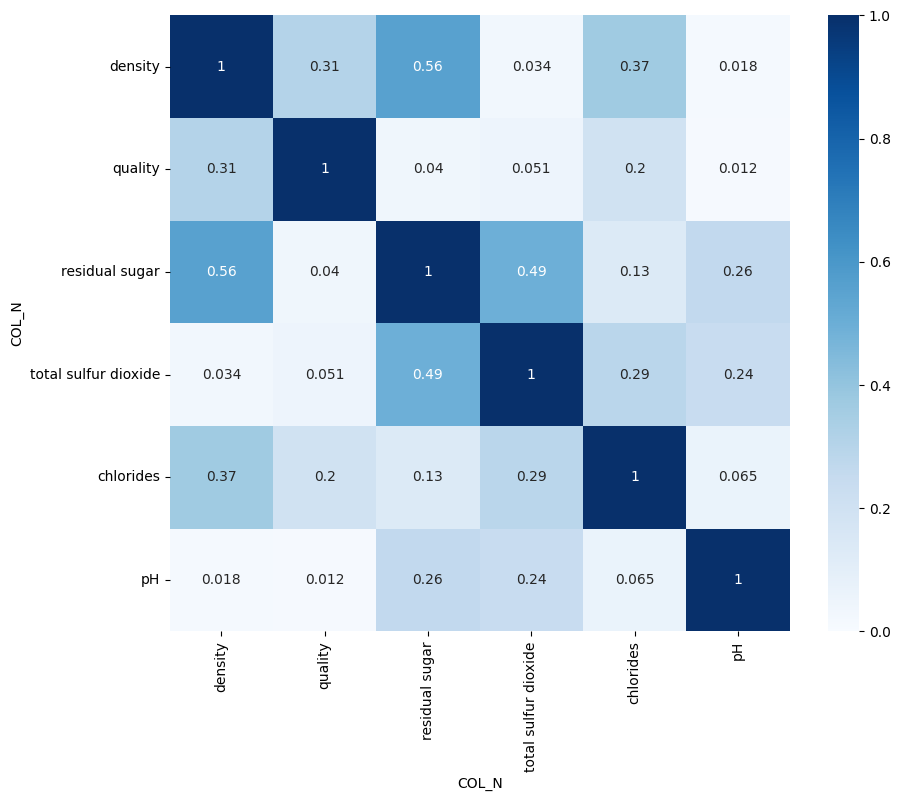

In [127]:
# Comprobamos las correlaciones entre las variables

plt.figure(figsize = (10,8))
sns.heatmap(np.abs(train_set_reg[features_num_reg].corr(numeric_only = True)), annot = True, cmap = "Blues", vmin=0, vmax=1)

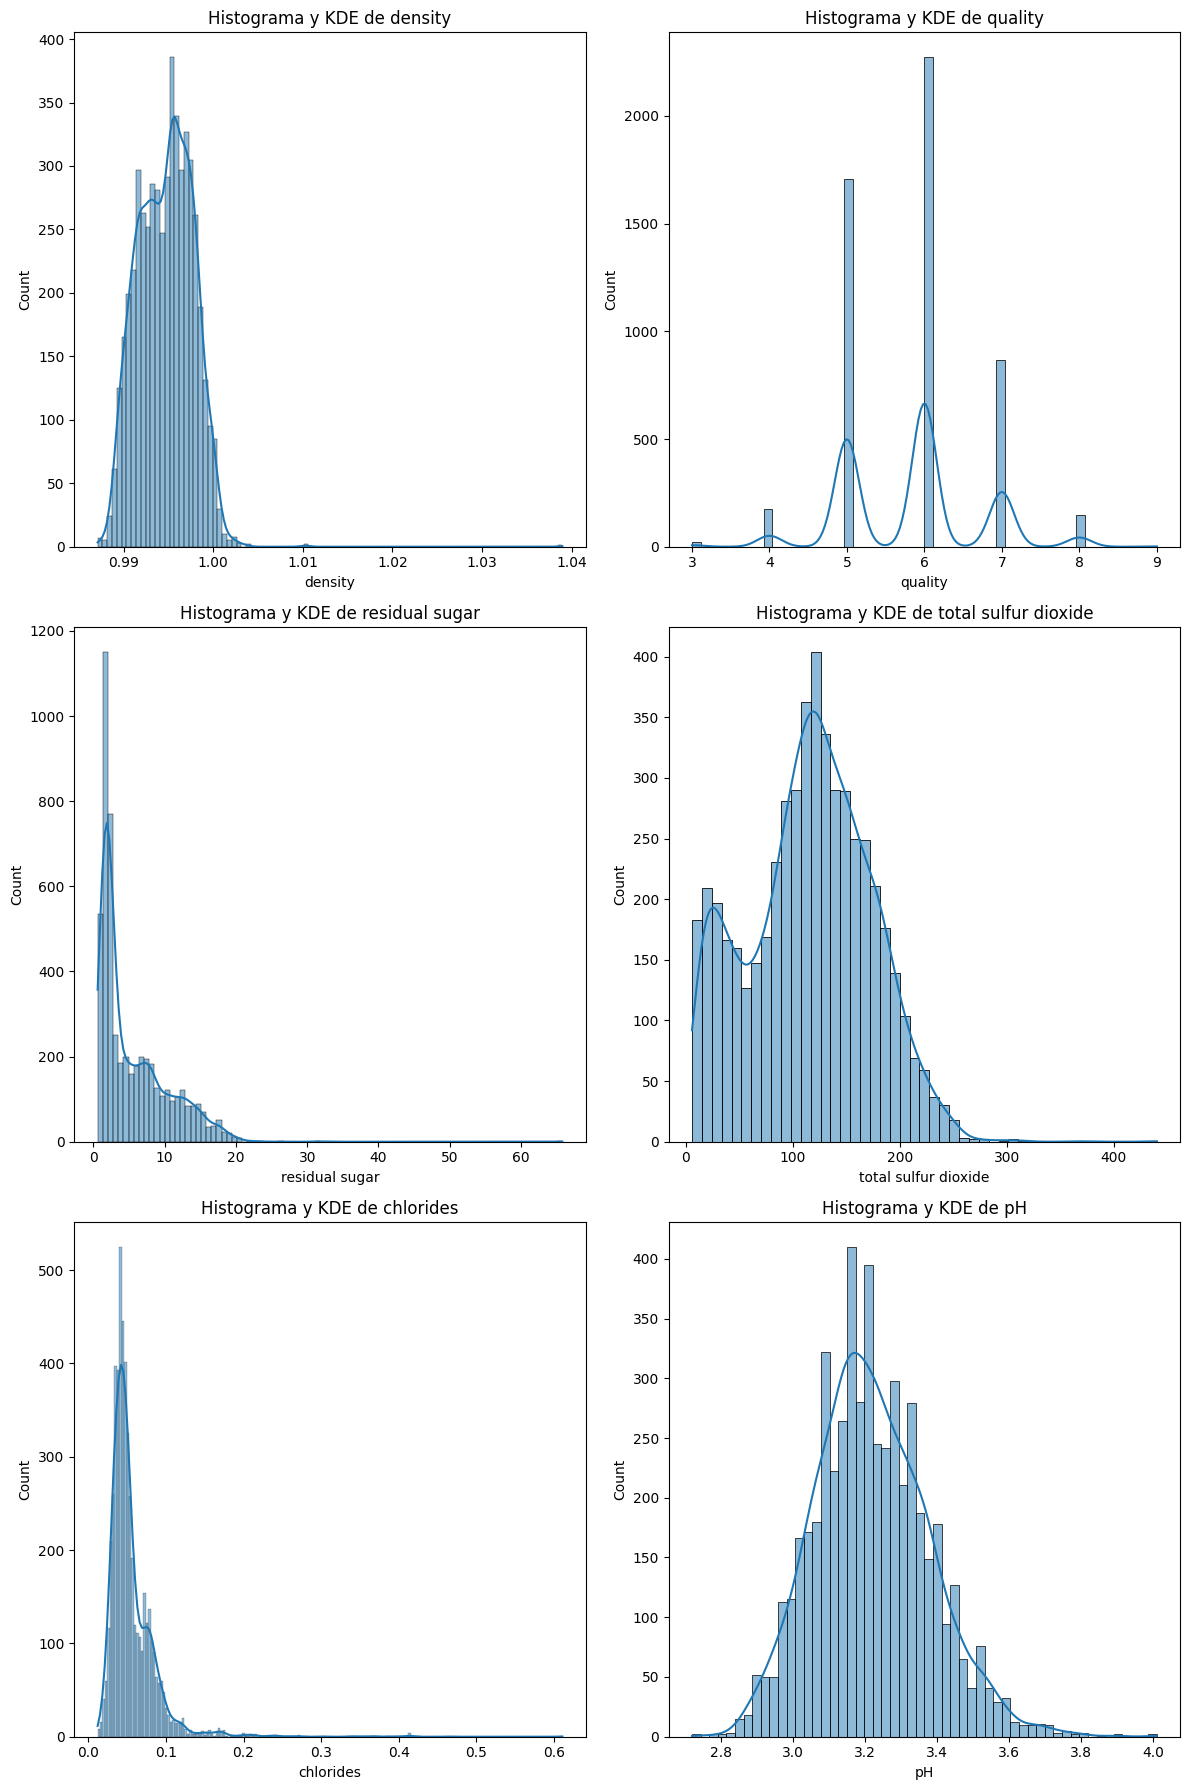

In [128]:
plot_histo_den(train_set_reg, features_num_reg)

In [129]:
# Comprobamos los valores = 0 de las diferentes variables

for i in features_num_reg:
    print(f"Columna {i}: {sum(train_set_reg[i] == 0)} valores igual a 0")

Columna density: 0 valores igual a 0
Columna quality: 0 valores igual a 0
Columna residual sugar: 0 valores igual a 0
Columna total sulfur dioxide: 0 valores igual a 0
Columna chlorides: 0 valores igual a 0
Columna pH: 0 valores igual a 0
